In [100]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1) 
df=pd.read_csv("loan.csv")
df.head(5)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [101]:
#Dropping the unnecessary rows
df.drop(df.index[df['loan_status'] == 'Current'], inplace = True)


In [102]:
df.shape

(38577, 111)

In [103]:
#%of Nan values in each column

round(100*(df.isnull().sum()/len(df.id)), 2)


id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.68  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.47 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti             

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


In [105]:
#listing column name which is having Nan greater than 60%
Nan_list=list(round(100*(df.isnull().sum()/len(df.id)), 2)[round(100*(df.isnull().sum()/len(df.id)), 2) >= 60].index)
print(Nan_list)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [106]:
#Dropping these columns
df=df.drop(Nan_list,axis=1)
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1069639,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0

In [107]:
df.shape

(38577, 54)

In [108]:
#findind unique values in each column
df.nunique().sort_values()

tax_liens                     1    
delinq_amnt                   1    
chargeoff_within_12_mths      1    
acc_now_delinq                1    
application_type              1    
policy_code                   1    
initial_list_status           1    
out_prncp                     1    
collections_12_mths_ex_med    1    
out_prncp_inv                 1    
pymnt_plan                    1    
term                          2    
loan_status                   2    
pub_rec_bankruptcies          3    
verification_status           3    
home_ownership                5    
pub_rec                       5    
grade                         7    
inq_last_6mths                9    
emp_length                    11   
delinq_2yrs                   11   
purpose                       14   
sub_grade                     35   
open_acc                      40   
addr_state                    50   
issue_d                       55   
total_acc                     82   
last_pymnt_d                

In [109]:
#removing unneccesary columns
drop_columns= ['open_acc','out_prncp','out_prncp_inv','pub_rec','title','last_pymnt_amnt','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','collection_recovery_fee','inq_last_6mths','installment','last_credit_pull_d','total_rec_prncp','url','collections_12_mths_ex_med','policy_code','chargeoff_within_12_mths','pymnt_plan','delinq_amnt','acc_now_delinq','application_type','initial_list_status','tax_liens']
df=df.drop(drop_columns,axis=1)

In [110]:
df.shape


(38577, 28)

In [111]:
#%Nan in each column
round(100*(df.isnull().sum()/len(df.id)), 2)

id                      0.00 
member_id               0.00 
loan_amnt               0.00 
funded_amnt             0.00 
funded_amnt_inv         0.00 
term                    0.00 
int_rate                0.00 
grade                   0.00 
sub_grade               0.00 
emp_title               6.19 
emp_length              2.68 
home_ownership          0.00 
annual_inc              0.00 
verification_status     0.00 
issue_d                 0.00 
loan_status             0.00 
desc                    32.47
purpose                 0.00 
zip_code                0.00 
addr_state              0.00 
dti                     0.00 
delinq_2yrs             0.00 
earliest_cr_line        0.00 
revol_bal               0.00 
revol_util              0.13 
recoveries              0.00 
last_pymnt_d            0.18 
pub_rec_bankruptcies    1.81 
dtype: float64

In [112]:
#imputing  the null value for columnms 

df['desc']=df['desc'].fillna(value='Description Not Available')
df['desc'].isnull().sum()

0

In [113]:
#handling the null value for Emp_title 

df['emp_title'].describe()
df['emp_title']=df['emp_title'].fillna(value='Other')
df['emp_title'].isnull().sum()
#'Us Army' repeated with higest frequency

0

In [114]:
df['emp_length'].isnull().sum()

#Replacing the value of 10+ with 10 years and <1 years with 1 year

df['emp_length'] = df['emp_length'].apply(lambda x: '1' if   x == '< 1 year'  else x)

#df['emp_length'] = df['emp_length'].apply(lambda x: x.replace('years','') if 'years' in x  else x)
#df['emp_length'] = df['emp_length'].str.replace('years', '')
df['emp_length'] = df['emp_length'].str.replace('year', '')
df['emp_length'] = df['emp_length'].apply(lambda x: '10' if   x == '10+ years'  else x)

df['emp_length']
df['emp_length'] = df['emp_length'].apply(lambda x: '10' if   x == '10+ s'  else x)
df['emp_length'] = df['emp_length'].str.replace(' s', '')
df['emp_length'] = df['emp_length'].str.replace(' ', '')

df['emp_length'].median()
#replacing the null values with median value
df['emp_length']=df['emp_length'].fillna(value=df['emp_length'].median())
df['emp_length'].describe()
df["emp_length"]=df["emp_length"].astype(int)
#'10+ years'repeated with higest frequency


In [115]:
#replacing the null values with median value
#df['emp_title']=df['emp_title'].fillna(value=df['emp_length'].median())

#df["emp_length"]=df["emp_length"].astype(int)
#df['emp_length'].describe()

In [116]:
df['pub_rec_bankruptcies'].describe()
df['pub_rec_bankruptcies'].isnull().sum()
#mean=0

697

In [117]:
state_by_grade=df.pivot_table(values='int_rate',columns='loan_status',index=['addr_state','grade'],aggfunc='count').reset_index()
temp1=state_by_grade[state_by_grade.addr_state.isin(["CA","FL","NY"])]
temp1.head(30)

loan_status,addr_state,grade,Charged Off,Fully Paid
28,CA,A,111.0,1545.0
29,CA,B,292.0,1882.0
30,CA,C,259.0,1153.0
31,CA,D,236.0,736.0
32,CA,E,154.0,362.0
33,CA,F,58.0,115.0
34,CA,G,15.0,31.0
62,FL,A,59.0,686.0
63,FL,B,145.0,711.0
64,FL,C,112.0,434.0


In [118]:
dd=state_by_grade.groupby('addr_state').sum()
dd['coff/fp']=dd['Charged Off']/dd['Fully Paid']
dd.sort_values('coff/fp',ascending=False)

loan_status,Charged Off,Fully Paid,coff/fp
addr_state,,,
NE,3.0,2.0,1.500000
NV,108.0,371.0,0.291105
SD,12.0,50.0,0.240000
AK,15.0,63.0,0.238095
FL,504.0,2277.0,0.221344
MO,114.0,556.0,0.205036
HI,28.0,138.0,0.202899
ID,1.0,5.0,0.200000
NM,30.0,153.0,0.196078


In [119]:
round(100*(df.isnull().sum()/len(df.id)), 2)
#no such acolumn is having Nan value

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_title               0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
desc                    0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
revol_bal               0.00
revol_util              0.13
recoveries              0.00
last_pymnt_d            0.18
pub_rec_bankruptcies    1.81
dtype: float64

In [120]:
df['revol_util'].describe()

count     38527
unique    1088 
top       0%   
freq      954  
Name: revol_util, dtype: object

In [121]:
#df['tax_liens'].describe()
#mean and median is 0....imuting by mean
#df['tax_liens']=df['tax_liens'].fillna(value=0)
df['last_pymnt_d'].describe()
#'Mar-13'is frequently repeatating so impute by this value
df['last_pymnt_d']=df['last_pymnt_d'].fillna(value='Mar-13')
df['pub_rec_bankruptcies'].describe()
#imputing with median
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(value=df['pub_rec_bankruptcies'].median())
df['revol_util'].describe()
#0%is most frequent
df['revol_util']=df['revol_util'].fillna(value='0%')
df.isnull().sum()


df['revol_util'] = df['revol_util'].str.replace('%', '')
df["revol_util"]=df["revol_util"].astype(float)

In [122]:
#converting column to datetype
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df.last_pymnt_d, format='%b-%y')

#rounding off interest rate

df['int_rate'] = df['int_rate'].str.replace('%', '')
df["int_rate"]=df["int_rate"].astype(float)
df['roundedOffInterestRate'] =  df.int_rate.round(0) 

df['dtiRoundedOff'] =  df.dti.round(0) 
df['revol_utilRoundedOff'] =  df.revol_util.round(0) 

In [123]:
df.nunique().sort_values()

loan_status               2    
term                      2    
pub_rec_bankruptcies      3    
verification_status       3    
home_ownership            5    
grade                     7    
emp_length                10   
delinq_2yrs               11   
purpose                   14   
roundedOffInterestRate    20   
dtiRoundedOff             31   
sub_grade                 35   
addr_state                50   
issue_d                   55   
last_pymnt_d              101  
revol_utilRoundedOff      101  
int_rate                  370  
earliest_cr_line          524  
zip_code                  822  
loan_amnt                 870  
funded_amnt               1019 
revol_util                1088 
dti                       2853 
recoveries                4040 
annual_inc                5215 
funded_amnt_inv           8050 
revol_bal                 21275
desc                      25804
emp_title                 28027
member_id                 38577
id                        38577
dtype: i

In [124]:
round(100*(df.isnull().sum()/len(df.id)), 2)

id                        0.0
member_id                 0.0
loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
int_rate                  0.0
grade                     0.0
sub_grade                 0.0
emp_title                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
verification_status       0.0
issue_d                   0.0
loan_status               0.0
desc                      0.0
purpose                   0.0
zip_code                  0.0
addr_state                0.0
dti                       0.0
delinq_2yrs               0.0
earliest_cr_line          0.0
revol_bal                 0.0
revol_util                0.0
recoveries                0.0
last_pymnt_d              0.0
pub_rec_bankruptcies      0.0
roundedOffInterestRate    0.0
dtiRoundedOff             0.0
revol_utilRoundedOff      0.0
dtype: float64

### There are no null values present in our data

# Data Analysis 

In [125]:
df.shape

(38577, 31)

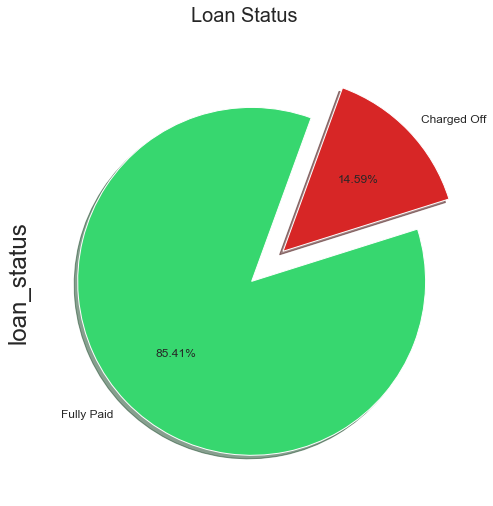

In [126]:
#first put
fig = plt.figure(figsize=(8,8))
colors = ["#37d76f", "#D72626"]
labels ="Fully Paid", "Charged Off"

plt.suptitle('Loan Status', fontsize=20)

df["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)



##### There are around 14.5% chance of loan getting charged off

# Univariate Analysis

#### State Variable

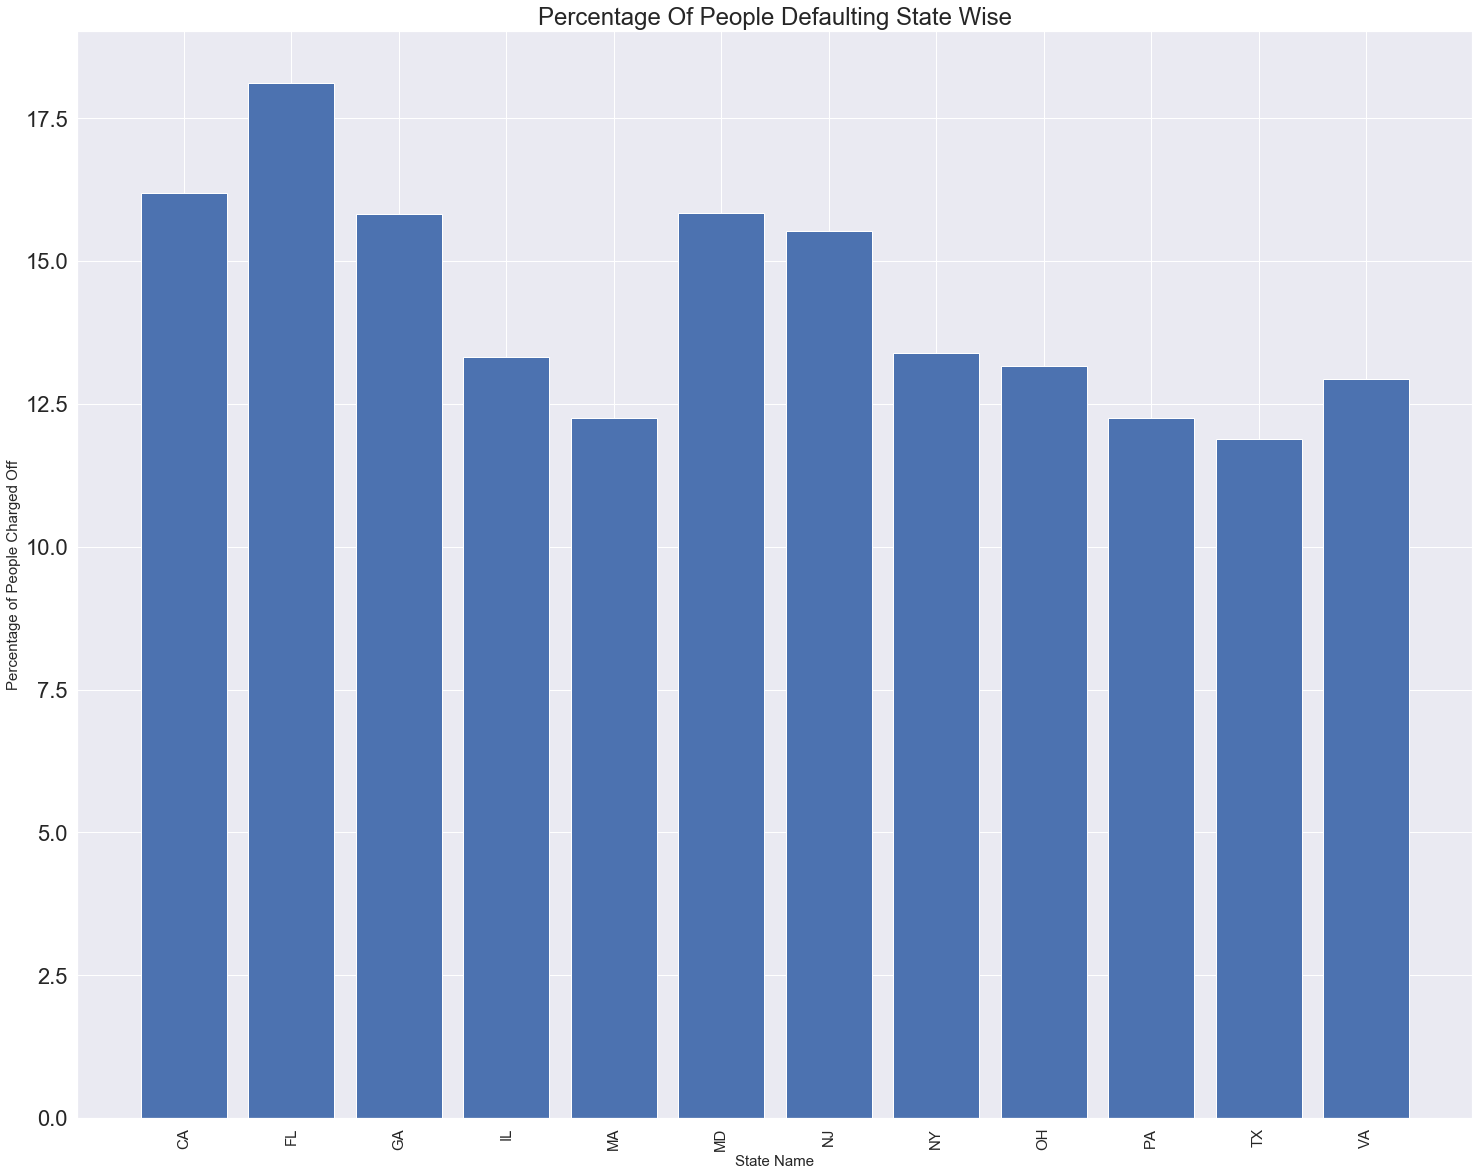

In [127]:



groupByStatetDf = pd.DataFrame(df.groupby('addr_state')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))



groupByStatetDf['addr_state']  = groupByStatetDf.index
groupByStatetDf['ChargedOffCount'] = pd.DataFrame(df.groupby('addr_state')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))

groupByStatetDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('addr_state')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByStatetDf['Total_count'] = groupByStatetDf['Fully_Paid_Count'] + groupByStatetDf['ChargedOffCount'] 
groupByStatetDf = groupByStatetDf[groupByStatetDf['Total_count'] >= 1000] 


groupByStatetDf['chargedOffPercentage'] = groupByStatetDf['ChargedOffCount']/(groupByStatetDf['Fully_Paid_Count']+groupByStatetDf['ChargedOffCount']) * 100
groupByStatetDf['fullyPaidPercentage'] = groupByStatetDf['Fully_Paid_Count']/(groupByStatetDf['Fully_Paid_Count']+groupByStatetDf['ChargedOffCount']) * 100
groupByStatetDf.head(10)


fig  = plt.figure(figsize=(25,20))



xAxisValue = list(groupByStatetDf.addr_state)
#groupByStatetDf = groupByStatetDf.drop(columns=['loan_status', 'Total_count','ChargedOffCount','Fully_Paid_Count','fullyPaidPercentage'])
#groupByRevolvUtilDf.plot.line()
valuesList = list(groupByStatetDf.chargedOffPercentage)

plt.bar(xAxisValue, valuesList)
plt.xlabel('State Name', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting State Wise')
plt.savefig('stateBarChart1.png')
plt.show()

#groupByStatetDf.sort_values('chargedOffPercentage',ascending=False)


#### The top three states to default in loan are Florida,Missouri and California,  if we consider the ratio of people who defaulted to people who fully paid loan, 

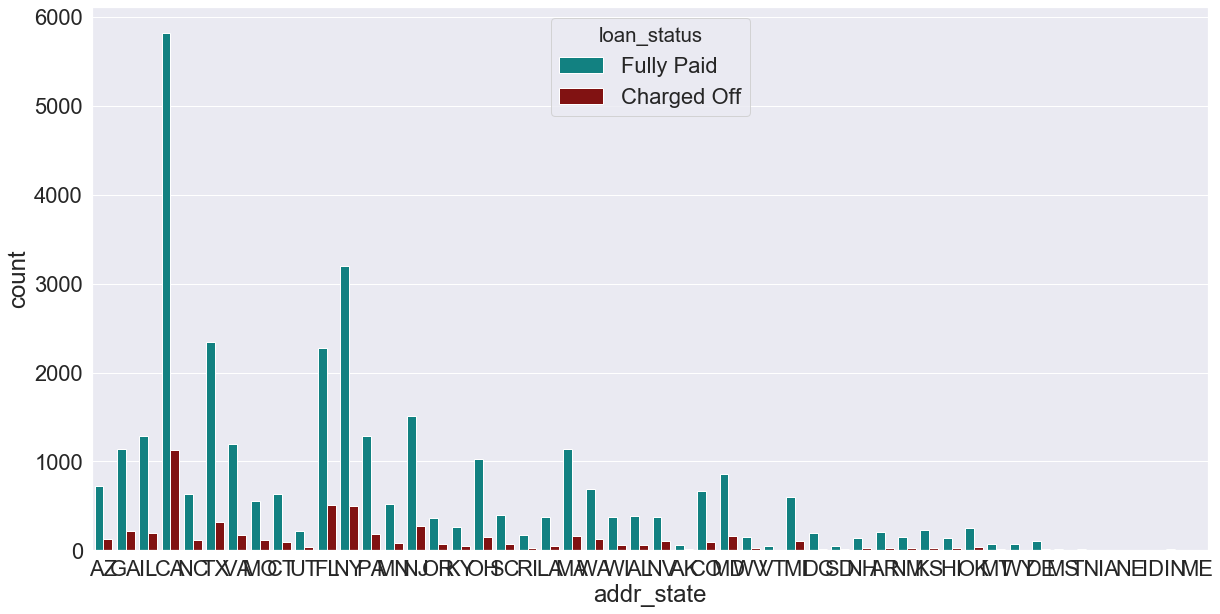

In [128]:

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']

sns.countplot(x='addr_state', data=df, 
                  palette=palette, hue='loan_status')
plt.show()

##### CA,Fl,NY states are most risky states for loan


In [129]:
state=df[['addr_state','loan_amnt','dti','annual_inc']].sort_values('loan_amnt')
state_temp=state[state.addr_state.isin(["CA","FL","NY"])]
state_temp.groupby('addr_state').mean().sort_values(by='loan_amnt',ascending=False)




,loan_amnt,dti,annual_inc
addr_state,,,
CA,11214.145920,12.806178,71690.454332
NY,11147.093023,12.228621,71468.457712
FL,10591.163251,13.476645,64444.459036


##### People of California and New York have more income than Florida, so the state with most risk is florida

In [130]:
## Groping the Annual Income
for col in [df]:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'
df.pivot_table(values='id',columns='loan_status',index=['income_category'],aggfunc='count').reset_index()

loan_status,income_category,Charged Off,Fully Paid
0,High,60,510
1,Low,5035,28061
2,Medium,532,4379


##### low level income charged off likely

In [131]:
df.pivot_table(values='int_rate',columns='loan_status',index=['income_category'],aggfunc='mean')

loan_status,Charged Off,Fully Paid
income_category,,
High,15.690000,13.058333
Low,13.683335,11.513576
Medium,14.907105,12.057413


Factors related to income

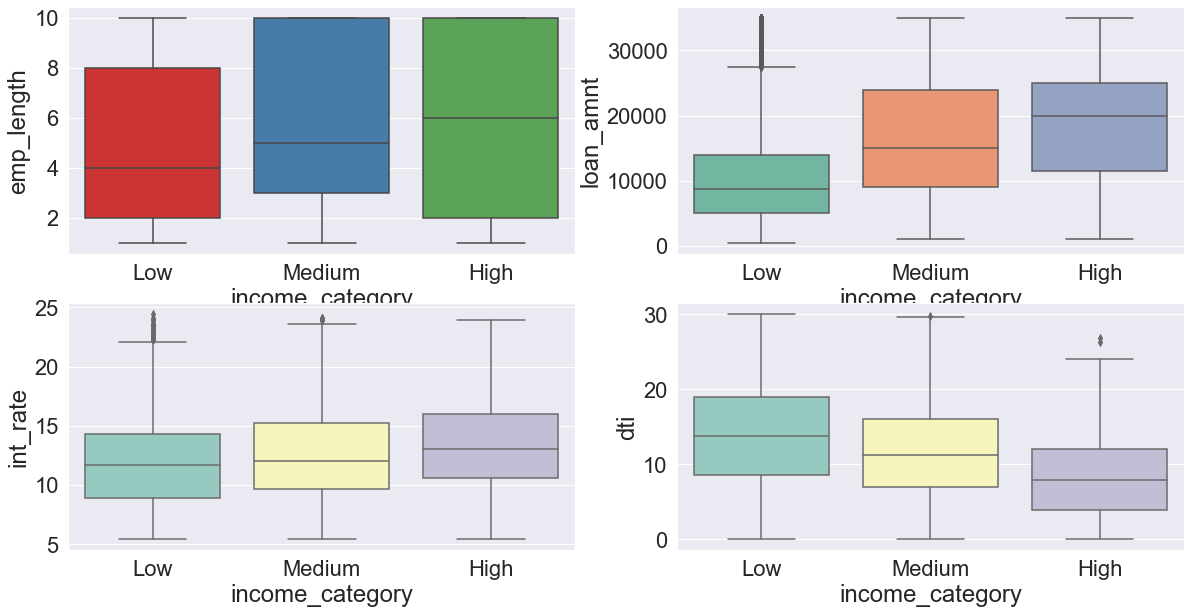

In [132]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(x="income_category", y="emp_length", data=df, palette="Set1")
plt.subplot(222)
sns.boxplot(x="income_category", y="loan_amnt", data=df, palette="Set2")
plt.subplot(223)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set3")
plt.subplot(224)
sns.boxplot(x="income_category", y="dti", data=df, palette="Set3")

Observations
1)since emplyment lenght of low level income is less,they are not capable to repay and have more risk.
2)the intersert rate of low income category is not low compared eith other.
3)DTI is more for low income category.

20


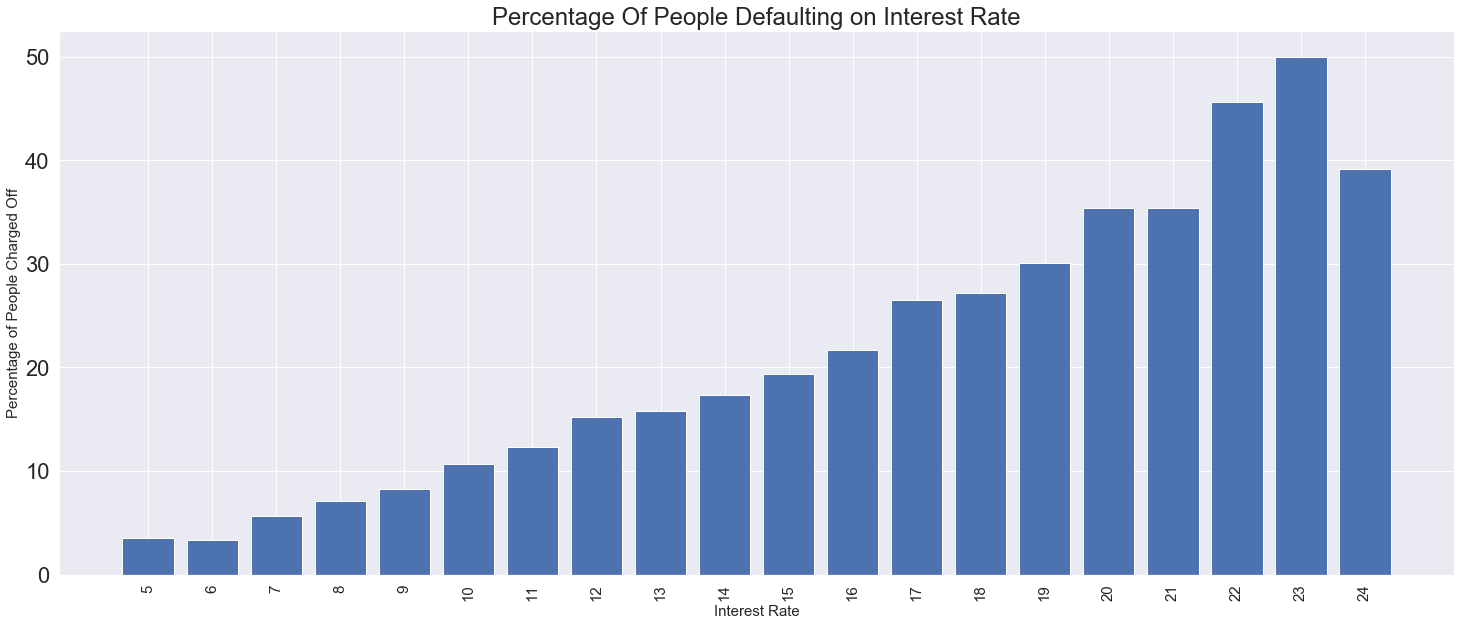

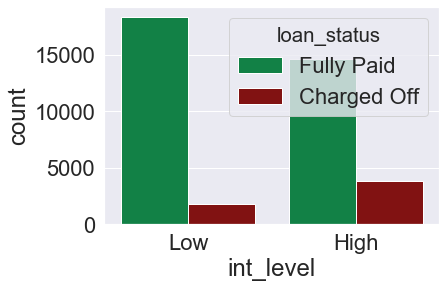

In [133]:
# Analysing the Interest Rate
groupByIntrestDf = pd.DataFrame(df.groupby('roundedOffInterestRate')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))



groupByIntrestDf['roundedOffInterestRate']  = groupByIntrestDf.index
groupByIntrestDf['ChargedOffCount'] = pd.DataFrame(df.groupby('roundedOffInterestRate')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByIntrestDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('roundedOffInterestRate')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByIntrestDf['chargedOffPercentage'] = groupByIntrestDf['ChargedOffCount']/(groupByIntrestDf['Fully_Paid_Count']+groupByIntrestDf['ChargedOffCount']) * 100
groupByIntrestDf['fullyPaidPercentage'] = groupByIntrestDf['Fully_Paid_Count']/(groupByIntrestDf['Fully_Paid_Count']+groupByIntrestDf['ChargedOffCount']) * 100
groupByIntrestDf.head(10)


fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByIntrestDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByIntrestDf.roundedOffInterestRate)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Interest Rate')
plt.show()
for col in [df]:
    col.loc[col['int_rate'] <= 11.93, 'int_level'] = 'Low'
    col.loc[col['int_rate'] > 11.93, 'int_level'] = 'High'

sns.countplot(x='int_level', data=df, 
                   palette=['#009345', '#930000'], hue='loan_status')
#

Higher level interest rate are more charged off

### Analysing the Intrest Rate and Annual Income

##### From the above graph at interest rate of more than 15 percent, there are many person defaultib on loan, so we will consider the data where interest rate is greater than 15 percent

4
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, (10000, 50000] to (200000, 300000]
Data columns (total 6 columns):
loan_status             4 non-null int64
ChargedOffCount         4 non-null int32
income_range            4 non-null object
Fully_Paid_Count        4 non-null int64
chargedOffPercentage    4 non-null float64
fullyPaidPercentage     4 non-null float64
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 484.0+ bytes


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


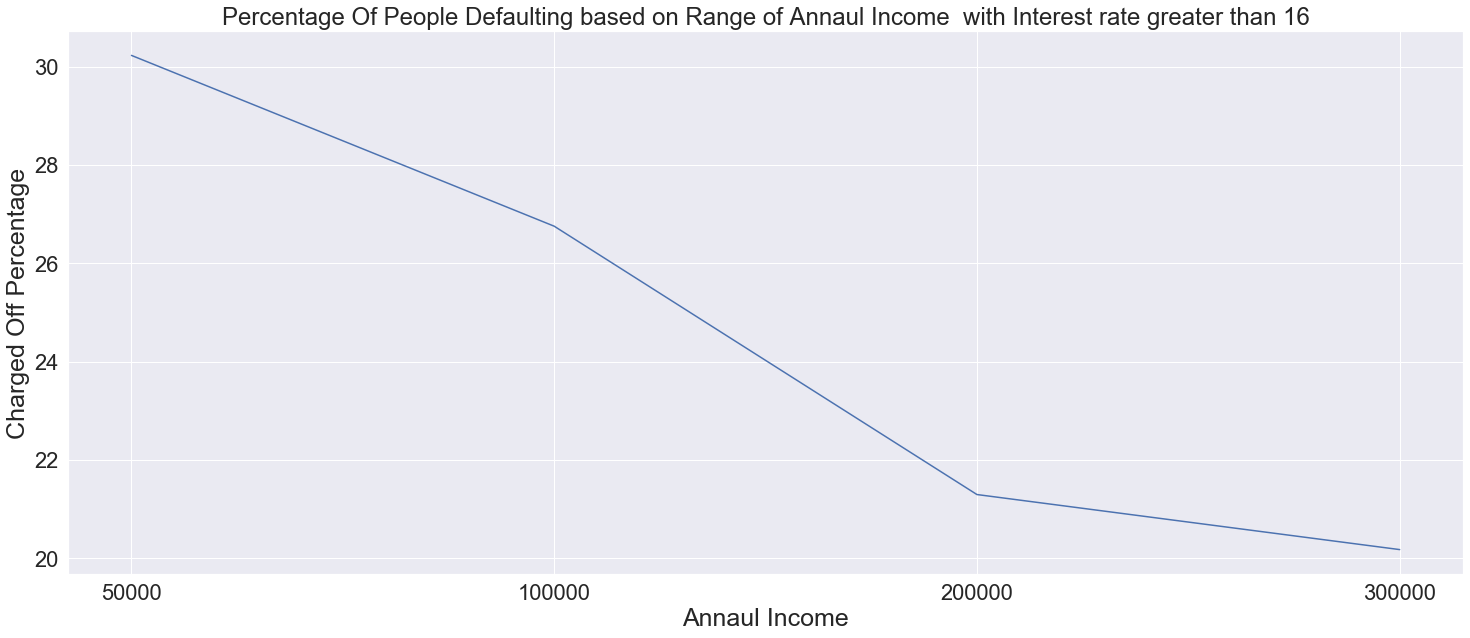

,loan_status,ChargedOffCount,income_range,Fully_Paid_Count,chargedOffPercentage,fullyPaidPercentage
annual_inc,,,,,,
"(10000, 50000]",685,685,"(10000, 50000]",1581,30.229479,69.770521
"(50000, 100000]",892,892,"(50000, 100000]",2442,26.754649,73.245351
"(100000, 200000]",240,240,"(100000, 200000]",887,21.295475,78.704525
"(200000, 300000]",23,23,"(200000, 300000]",91,20.175439,79.824561


In [134]:

interrestDf = df.loc[df['roundedOffInterestRate'] > 15] 
interrestDf.shape
ranges=[1000,10000,50000,100000,200000,300000,400000,500000,600000,1000000]
groupByIncomeDf = interrestDf.groupby(pd.cut(interrestDf.annual_inc, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByIncomeDf = groupByIncomeDf.to_frame()
groupByIncomeDf['ChargedOffCount'] = interrestDf.groupby(pd.cut(interrestDf.annual_inc, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByIncomeDf = groupByIncomeDf[groupByIncomeDf['ChargedOffCount'] >= 5] 

groupByIncomeDf['income_range']  = groupByIncomeDf.index
groupByIncomeDf['Fully_Paid_Count'] = pd.DataFrame(interrestDf.groupby(pd.cut(interrestDf.annual_inc, ranges))['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByIncomeDf['chargedOffPercentage'] = groupByIncomeDf['ChargedOffCount']/(groupByIncomeDf['Fully_Paid_Count']+groupByIncomeDf['ChargedOffCount']) * 100
groupByIncomeDf['fullyPaidPercentage'] = groupByIncomeDf['Fully_Paid_Count']/(groupByIncomeDf['Fully_Paid_Count']+groupByIncomeDf['ChargedOffCount']) * 100
#a.head(10)

groupByIncomeDf.head()
fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByIncomeDf.chargedOffPercentage)

print(len(valuesList))
groupByIncomeDf["income_range"] = groupByIncomeDf["income_range"].astype('str')

groupByIncomeDf.income_range_substr = groupByIncomeDf.income_range.str[7:16]
groupByIncomeDf.income_range_substr = groupByIncomeDf.income_range_substr.str.rstrip('  ,  ')
groupByIncomeDf.income_range_substr = groupByIncomeDf.income_range_substr.str.strip(', ')
groupByIncomeDf.income_range_substr = groupByIncomeDf.income_range_substr.str.strip(']')

groupByIncomeDf["ChargedOffCount"]=groupByIncomeDf["ChargedOffCount"].astype(int)
groupByIncomeDf.ChargedOffCount.describe()
groupByIncomeDf.info()

xAxisValue = list(groupByIncomeDf.income_range_substr)

#plt.bar(xAxisValue, valuesList)
#plt.xlabel('Annual Income', fontsize=15)
#plt.ylabel('Percentage of People Charged Off', fontsize=15)
#plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting based on Range of Annaul Income  with Interest rate greater than 16')
#plt.show()
plt.xlabel('Annaul Income',fontsize=25)
plt.ylabel('Charged Off Percentage',fontsize=25)
plt.plot(xAxisValue,valuesList)
plt.show()
groupByIncomeDf.head(10)


### From the above graph we can conclude that if the person annual income is on lower side and club is giving loan on higher rate of interest there is a more chance of people default on loan.
##### All the data in above graph contains data when loan was given on more than 15 percent

31


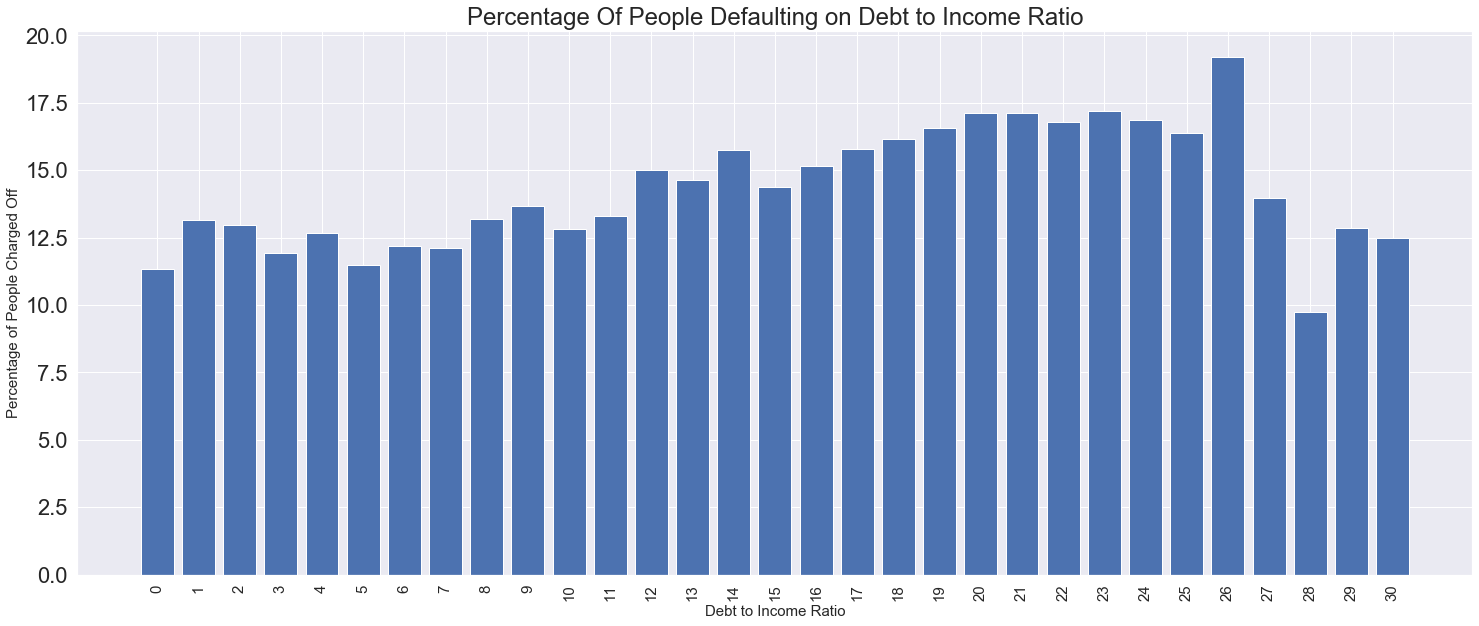

In [135]:

groupByDTItDf = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))



groupByDTItDf['dtirate']  = groupByDTItDf.index
groupByDTItDf['ChargedOffCount'] = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByDTItDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByDTItDf['chargedOffPercentage'] = groupByDTItDf['ChargedOffCount']/(groupByDTItDf['Fully_Paid_Count']+groupByDTItDf['ChargedOffCount']) * 100
groupByDTItDf['fullyPaidPercentage'] = groupByDTItDf['Fully_Paid_Count']/(groupByDTItDf['Fully_Paid_Count']+groupByDTItDf['ChargedOffCount']) * 100
groupByDTItDf.head(10)


fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByDTItDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByDTItDf.dtirate)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Debt to Income Ratio', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Debt to Income Ratio')
plt.show()

#


## The Bar Graph implies there is no such impact of DTI on person defaulting on loan. 
## We need to consider the annual income of person to see the impact of DTI on our analysis

In [136]:

### Commenting below cell due to large execution time
#sns.set(style="white")
#plt.figure(figsize=(20, 10))
#sns.countplot(x="annual_inc", hue="loan_status", data=df)
#plt.title('plot1')
#plt.show()

In [137]:
chargedOff = df.loc[df['loan_status'] == 'Charged Off'] 

In [138]:
chargedOff.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,revol_bal,revol_util,recoveries,last_pymnt_d,pub_rec_bankruptcies,roundedOffInterestRate,dtiRoundedOff,revol_utilRoundedOff,income_category,int_level
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,309xx,GA,1.00,0,1999-04-01,1687,9.4,117.08,2013-04-01,0.0,15.0,1.0,9.0,Low,High
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,F,F2,Other,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business,958xx,CA,5.55,0,2004-04-01,5210,32.6,189.06,2012-04-01,0.0,21.0,6.0,33.0,Low,High
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,B,B5,Starbucks,1,RENT,15000.0,Verified,2011-12-01,Charged Off,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other,774xx,TX,18.08,0,2004-09-01,9279,36.5,269.29,2012-11-01,0.0,13.0,18.0,36.0,Low,High
12,1064687,1298717,9000,9000,9000.00000,36 months,13.49,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/15/11 > Plan to pay off 2 charge accounts. I will close one of them and ask for a credit line decrease from the other. Also borrowed money from a friend and would like to pay that off.......<br><br> Borrower added on 12/17/11 > The credit card that I am asking to be decreased will be ONLY for emergency purposes.....<br>,debt_consolidation,245xx,VA,10.08,0,2004-04-01,10452,91.7,444.30,2012-07-01,0.0,13.0,10.0,92.0,Low,High
14,1069057,1303503,10000,10000,10000.00000,36 months,10.65,B,B2,SFMTA,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,Description Not Available,other,951xx,CA,7.06,0,1991-05-01,11997,55.5,645.10,2013-10-01,0.0,11.0,7.0,56.0,Low,Low
21,1039153,1269083,21000,21000,21000.00000,36 months,12.42,B,B4,Osram Sylvania,10,RENT,105000.0,Verified,2011-12-01,Charged Off,Borrower added on 12/16/11 > Decided to clean up the debt and get my finances together. Thank you for your consideration.<br>,debt_consolidation,335xx,FL,13.22,0,1983-02-01,32135,90.3,0.00,2013-09-01,0.0,12.0,13.0,90.0,Medium,High
24,1069559,1304634,6000,6000,6000.00000,36 months,11.71,B,B3,bmg-educational,1,RENT,76000.0,Not Verified,2011-12-01,Charged Off,Description Not Available,major_purchase,900xx,CA,2.40,0,2001-06-01,5963,29.7,269.31,2012-10-01,0.0,12.0,2.0,30.0,Low,Low
26,1069800,1304679,15000,15000,8725.00000,36 months,14.27,C,C2,nyc transit,9,RENT,60000.0,Not Verified,2011-12-01,Charged Off,Borrower added on 12/15/11 > looki

In [139]:
chargedOff.shape

(5627, 33)

In [140]:
#home ownership analsysis
func = lambda x: 100*x.count()/chargedOff.shape[0]
chargedOff.pivot_table(values='id',index='home_ownership',columns='loan_status',aggfunc=func).sort_values(by=['Charged Off'])


loan_status,Charged Off
home_ownership,
OTHER,0.319886
OWN,7.872756
MORTGAGE,41.354185
RENT,50.453172


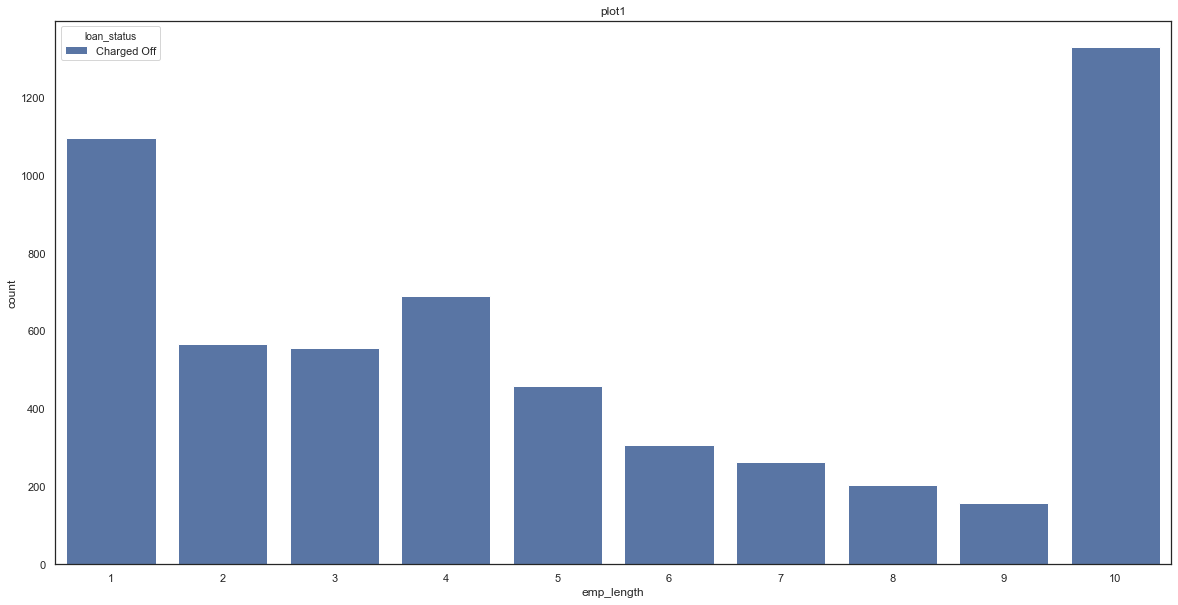

In [141]:
func = lambda x: 100*x.count()/chargedOff.shape[0]
chargedOff.pivot_table(values='id',index='emp_length',columns='loan_status',aggfunc=func).sort_values(by=['Charged Off'])
sns.set(style="white")
plt.figure(figsize=(20, 10))
sns.countplot(x="emp_length", hue="loan_status", data=chargedOff)
plt.title('plot1')
plt.show()

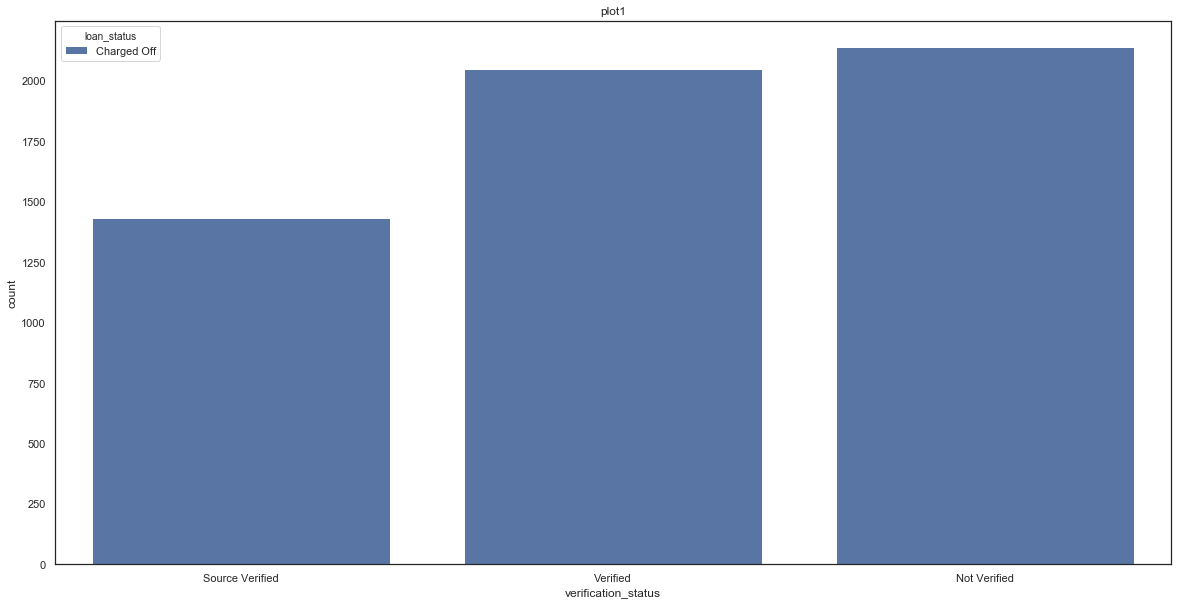

In [142]:
#verification status analyssis

func = lambda x: 100*x.count()/chargedOff.shape[0]
chargedOff.pivot_table(values='id',index='verification_status',columns='loan_status',aggfunc=func).sort_values(by=['Charged Off'])
sns.set(style="white")
plt.figure(figsize=(20, 10))
sns.countplot(x="verification_status", hue="loan_status", data=chargedOff)
plt.title('plot1')
plt.show()

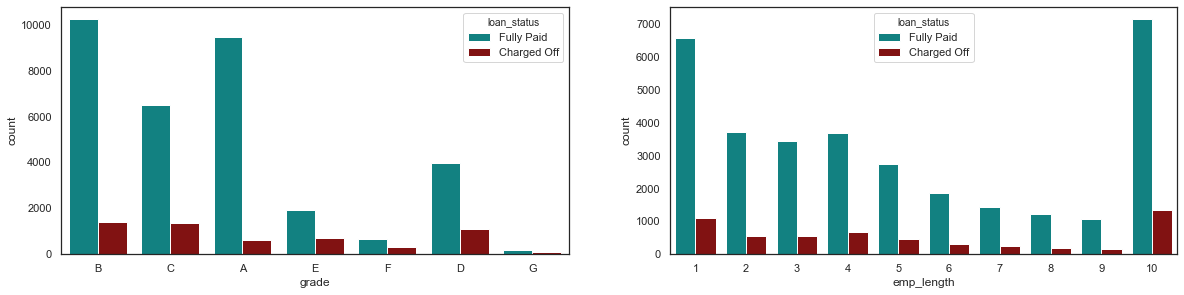

In [143]:

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax1 = sns.countplot(x='grade', data=df, 
                  palette=palette, hue='loan_status')
plt.subplot(222)
ax2 = sns.countplot(x='emp_length', data=df, 
                  palette=palette, hue='loan_status')

#Grade 'C' is having charged off more than Fully paid

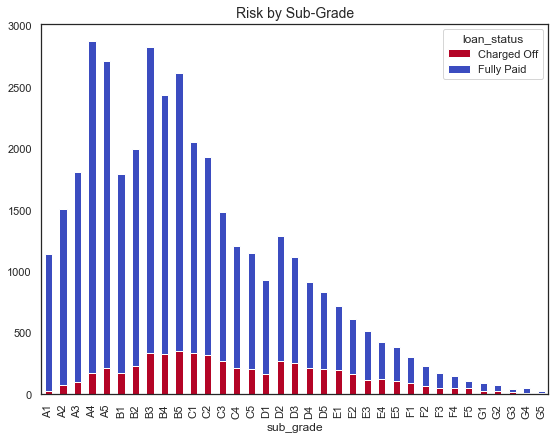

In [144]:
sns.set(style="white")
fig = plt.figure(figsize=(20,15))
cmap = plt.cm.coolwarm_r
subgrade = fig.add_subplot(221)
subgrade.set_title('Risk by Sub-Grade', fontsize=14)
risk_subgrade = df.groupby(['sub_grade', 'loan_status']).size()
risk_subgrade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=subgrade, grid=False)

In [145]:
v=df.pivot_table(values=['int_rate','annual_inc'],columns='loan_status',index='emp_length',aggfunc='mean')
#v['dfdfd']=v['Charged Off']/(v['Fully Paid']+v['Charged Off'])
#v.sort_values('dfdfd',ascending=True)
v.head(10)

annual_inc                  int_rate           
loan_status   Charged Off    Fully Paid Charged Off Fully Paid
emp_length                                                    
1            54249.786694  62569.306554  13.555817   11.643263
2            57409.903210  63963.024890  13.831781   11.719270
3            59601.141297  67832.856668  13.945748   11.637556
4            56687.582638  62671.456847  13.441261   11.472122
5            64249.784192  68653.557350  13.852336   11.650351
6            66101.841694  68329.710623  13.971889   11.629027
7            62575.109810  70417.223646  14.114715   11.719130
8            67778.180099  75520.273036  13.753793   11.492881
9            67041.580759  75607.559906  13.813608   11.541086
10           72578.473546  83239.595595  14.084515   11.567126

In [146]:

x=df[['emp_length','loan_status','int_rate']]
temp=x.pivot_table(values='int_rate',columns='loan_status',index='emp_length',aggfunc='mean')
temp.reset_index()
temp['c/f']=round(temp['Charged Off']/temp['Fully Paid'],2)
temp.reset_index()
temp.head(12)



loan_status,Charged Off,Fully Paid,c/f
emp_length,,,
1,13.555817,11.643263,1.16
2,13.831781,11.719270,1.18
3,13.945748,11.637556,1.20
4,13.441261,11.472122,1.17
5,13.852336,11.650351,1.19
6,13.971889,11.629027,1.20
7,14.114715,11.719130,1.20
8,13.753793,11.492881,1.20
9,13.813608,11.541086,1.20


Text(0, 0.5, 'int_rate')

<Figure size 2160x2160 with 0 Axes>

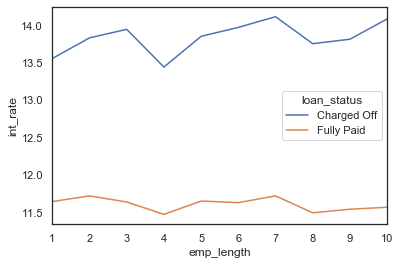

In [147]:
#Bivariate
sns.set(style="white")
fig = plt.figure(figsize=(30,30))
x=df[['emp_length','loan_status','int_rate']]
temp=x.pivot_table(values='int_rate',columns='loan_status',index='emp_length',aggfunc='mean').plot()
plt.ylabel('int_rate')

With higher interest rate charged off

In [148]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off    5627 
Name: loan_status, dtype: int64

In [149]:
#Bivariate of STate and Grade
state_by_grade=df.pivot_table(values='int_rate',columns='loan_status',index=['addr_state','grade'],aggfunc='count').reset_index()
temp1=state_by_grade[state_by_grade.addr_state.isin(["CA","FL","NY"])]
temp1.head(30)



loan_status,addr_state,grade,Charged Off,Fully Paid
28,CA,A,111.0,1545.0
29,CA,B,292.0,1882.0
30,CA,C,259.0,1153.0
31,CA,D,236.0,736.0
32,CA,E,154.0,362.0
33,CA,F,58.0,115.0
34,CA,G,15.0,31.0
62,FL,A,59.0,686.0
63,FL,B,145.0,711.0
64,FL,C,112.0,434.0


CA with grade 'B' has more number of risky loans
Fl with grade 'B' has more number of risky loans
NY with grade 'B' has more number of risky loans
It means that B grade has more number of charged of with respective top three charged countries

#### Analysis of Annual income

In [150]:
df.annual_inc.mean()

68777.97368120909

In [151]:
df.dti.mean()

13.272727013505502

1)36 month term is most risky 
2)but if we look ratio of charged off to fully paid it states that that the % risk is more in 60 month period

In [152]:
# Loan amount Univariate
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va) 

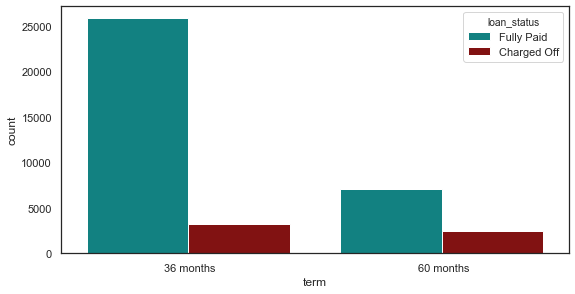

In [153]:
plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax1 = sns.countplot(x='term', data=df, 
                  palette=palette, hue='loan_status')

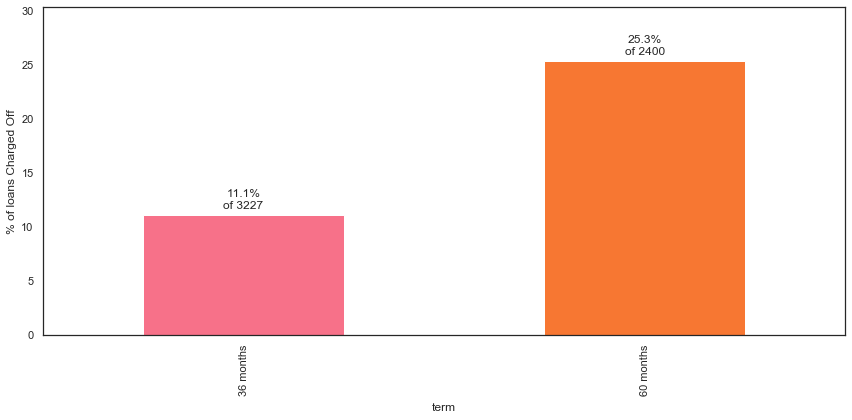

In [154]:
##Univariate of term
plt.figure(figsize=(12, 6))
color=sns.color_palette('Set3', 16)
ddrp = df.groupby(['loan_status','term'])['term'].count()
cnt = df.groupby('term')['term'].count()

percentages = ddrp.unstack() * 100 / cnt.T
bbx= percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
bbx.set_ylabel('% of loans ' + 'Charged Off')
showLabels(bbx, ddrp['Charged Off'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = ddrp.unstack() * 100 / cnt.T




% defaulter are under 60month term

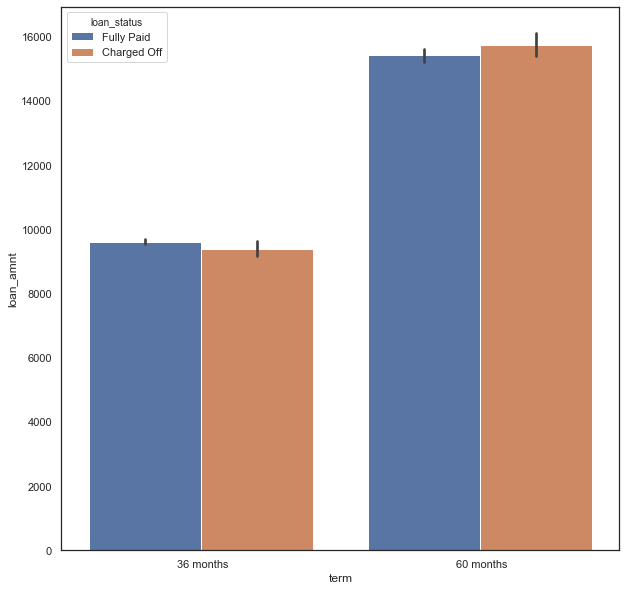

In [155]:
###bivariate of term and laon amount
sns.set(style="white")
fig = plt.figure(figsize=(10,10))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()


Loan amount between 8000-10000 with 36 month term having less risk as charged off are less since loan amount for them is less.

In [156]:
#Interest Rate
df['int_rate'].mean()

11.932218679523526

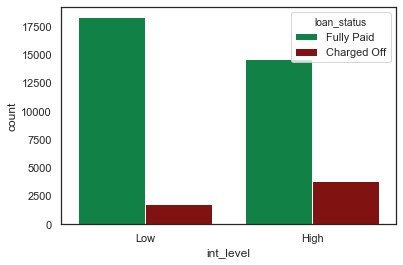

In [157]:
for col in [df]:
    col.loc[col['int_rate'] <= 11.93, 'int_level'] = 'Low'
    col.loc[col['int_rate'] > 11.93, 'int_level'] = 'High'

sns.countplot(x='int_level', data=df, 
                   palette=['#009345', '#930000'], hue='loan_status')

Higher level interest rate are more charged off

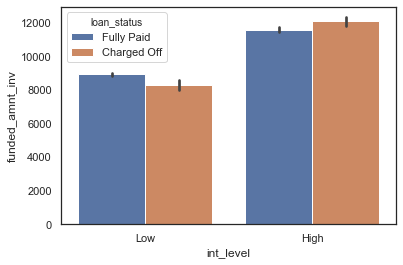

In [158]:
#bivariate of  amount from investor and interest rate category
sns.barplot(x='int_level', y='funded_amnt_inv', hue="loan_status", data=df, estimator=np.mean)
plt.show()


Higher loan amounts with higher interest rates are more risky.

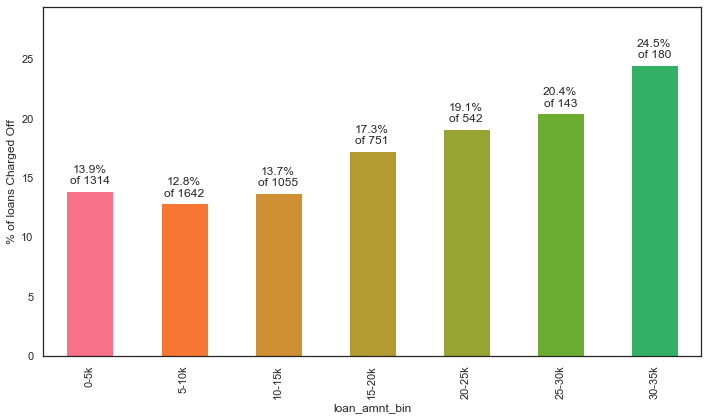

In [159]:
    
plt.figure(figsize=(10, 6))
color=sns.color_palette('Set2', 16)
grp = df.groupby(['loan_status','loan_amnt_bin'])['loan_amnt_bin'].count()
cnt = df.groupby('loan_amnt_bin')['loan_amnt_bin'].count()

percentages = grp.unstack() * 100 / cnt.T
ax= percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans ' + 'Charged Off')
showLabels(ax, grp['Charged Off'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = grp.unstack() * 100 / cnt.T
    
   



The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default. 

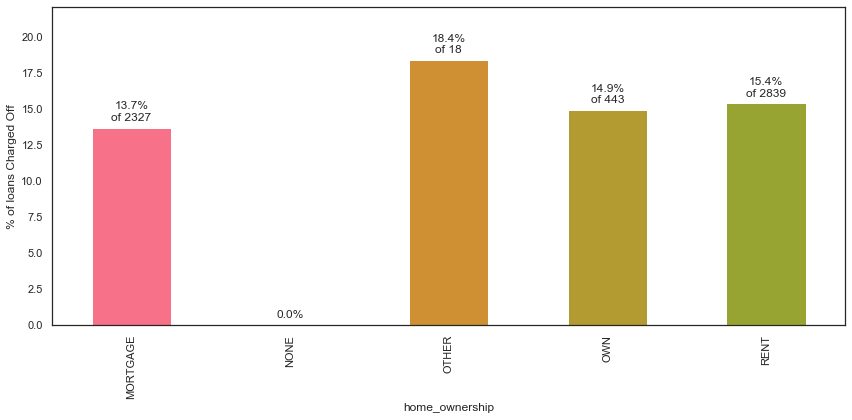

In [160]:
#Univariate
plt.figure(figsize=(12, 6))
color=sns.color_palette('Set3', 16)
srp = df.groupby(['loan_status','home_ownership'])['home_ownership'].count()
cnt = df.groupby('home_ownership')['home_ownership'].count()

percentages = srp.unstack() * 100 / cnt.T
bx= percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
bx.set_ylabel('% of loans ' + 'Charged Off')
showLabels(bx, srp['Charged Off'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = srp.unstack() * 100 / cnt.T



# Observation


### People having other type of property like Joint Tenancy,Joint Tenancy With Rights of Survivorship (JTWROS),Tenancy in Common,Community Property are with most to deault on loan.
###### People having own or mortage house are less likelt to default on loan
###### The highest Charged off are under other ie 18.4% and having more risk.

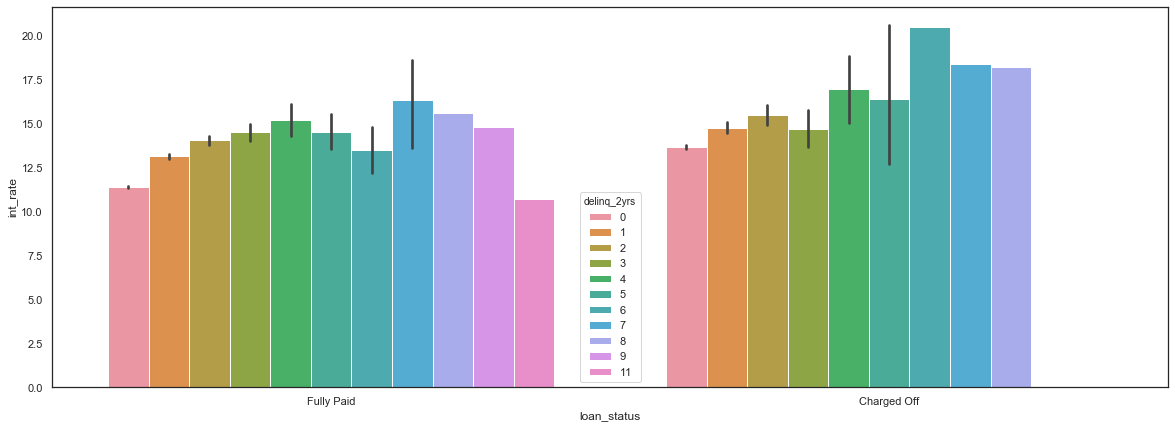

In [161]:
#Deliquincy in last 2 years
plt.figure(figsize=(20,7))
sns.barplot(x='loan_status', y='int_rate', hue='delinq_2yrs',data=df, estimator=np.mean)
plt.show()

14


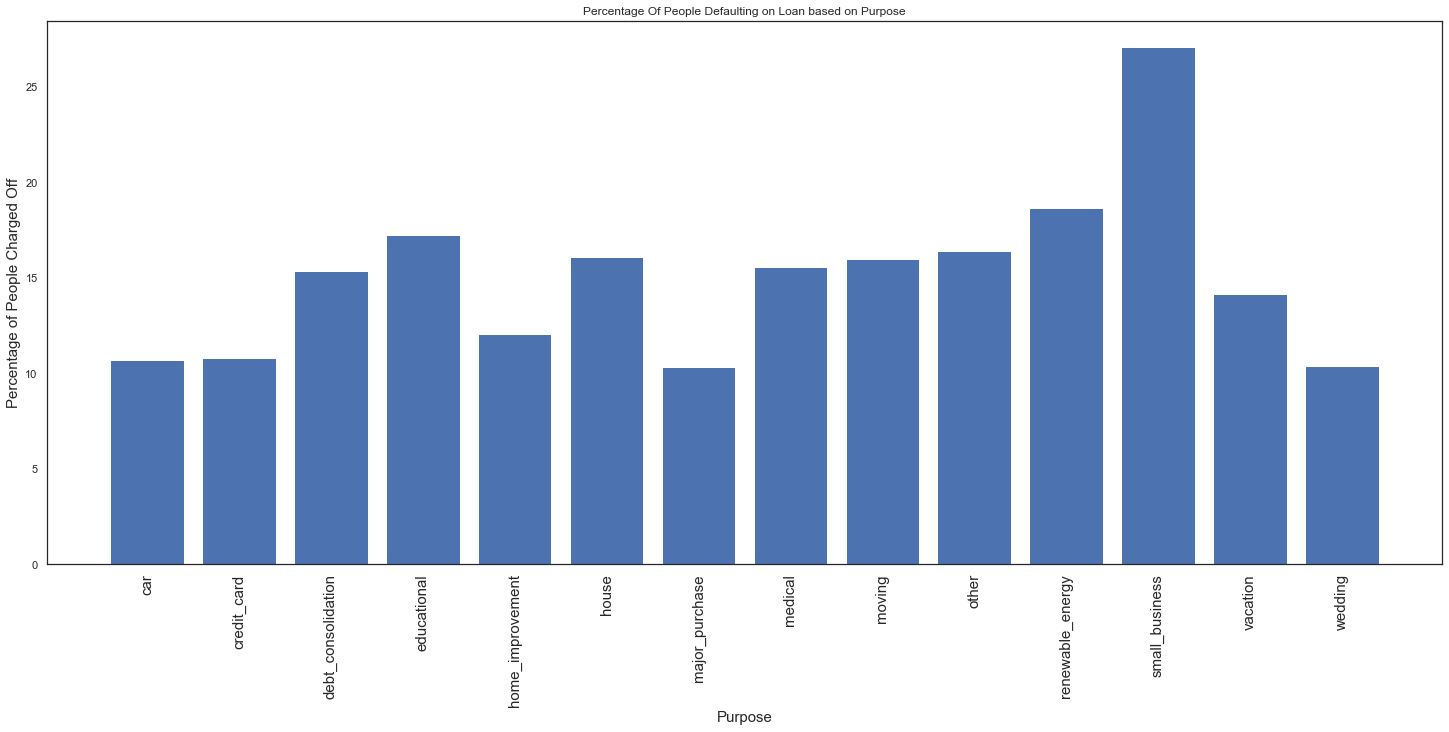

In [162]:
# Uniovariate analysis on purpose of loan
groupByPurposeDf = df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByPurposeDf = groupByPurposeDf.to_frame()
groupByPurposeDf['ChargedOffCount'] =df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByPurposeDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByPurposeDf['Purpose'] = groupByPurposeDf.index
groupByPurposeDf['chargedOffPercentage'] = groupByPurposeDf['ChargedOffCount']/(groupByPurposeDf['Fully_Paid_Count']+groupByPurposeDf['ChargedOffCount']) * 100
groupByPurposeDf['fullyPaidPercentage'] = groupByPurposeDf['Fully_Paid_Count']/(groupByPurposeDf['Fully_Paid_Count']+groupByPurposeDf['ChargedOffCount']) * 100
#groupByPurposeDf['Purpose']  = groupByPurposeDf.index
fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByPurposeDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByPurposeDf.Purpose)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Loan based on Purpose')
plt.show()

### As per the above bar chart People taking the loan for purpose of small business are with the highest percentage of loan defaulters. This also implies out of 4 people taking loan for small business one people will default on loan


10


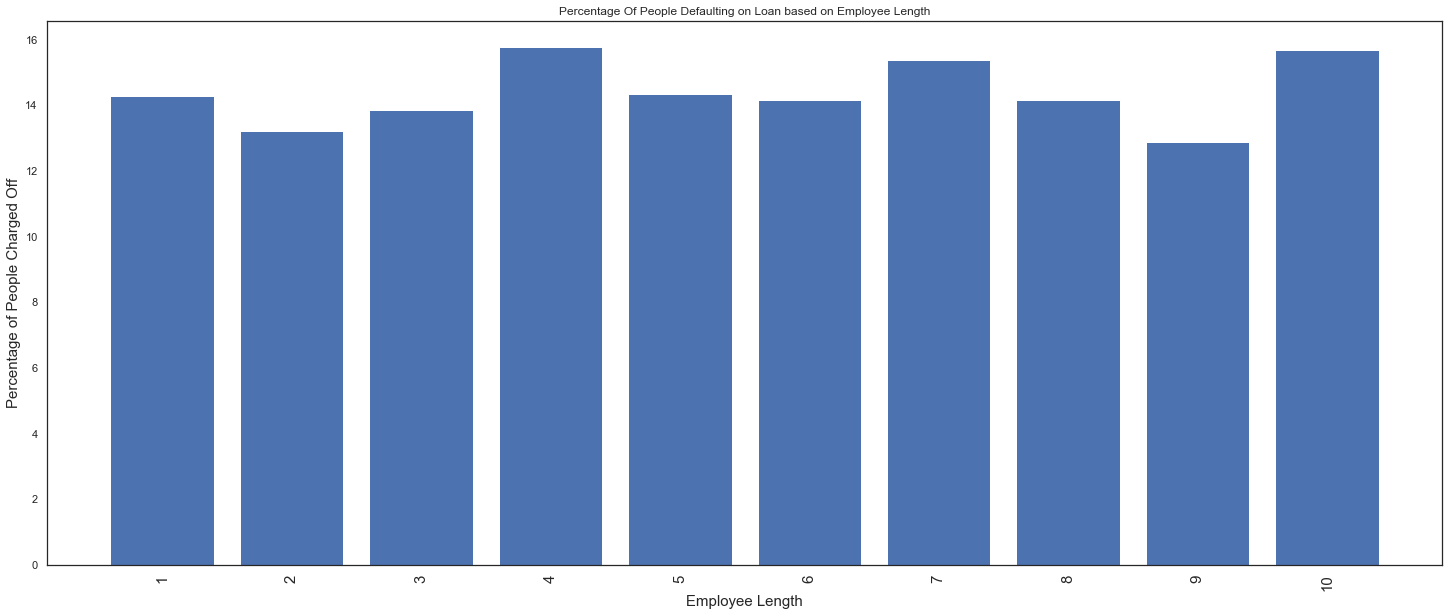

In [163]:
#Emplyee Length
groupByEmpLenDf = pd.DataFrame(df.groupby('emp_length')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByEmpLenDf['emp_length']  = groupByEmpLenDf.index
groupByEmpLenDf['ChargedOffCount'] = pd.DataFrame(df.groupby('emp_length')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByEmpLenDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('emp_length')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByEmpLenDf['chargedOffPercentage'] = groupByEmpLenDf['ChargedOffCount']/(groupByEmpLenDf['Fully_Paid_Count']+groupByEmpLenDf['ChargedOffCount']) * 100
groupByEmpLenDf['fullyPaidPercentage'] = groupByEmpLenDf['Fully_Paid_Count']/(groupByEmpLenDf['Fully_Paid_Count']+groupByEmpLenDf['ChargedOffCount']) * 100
groupByEmpLenDf.head(10)

fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByEmpLenDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByEmpLenDf.emp_length)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Employee Length', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Loan based on Employee Length')
plt.show()

#

### As per the above bar chart employee length will not have great impact on customer defaulting their loan


31


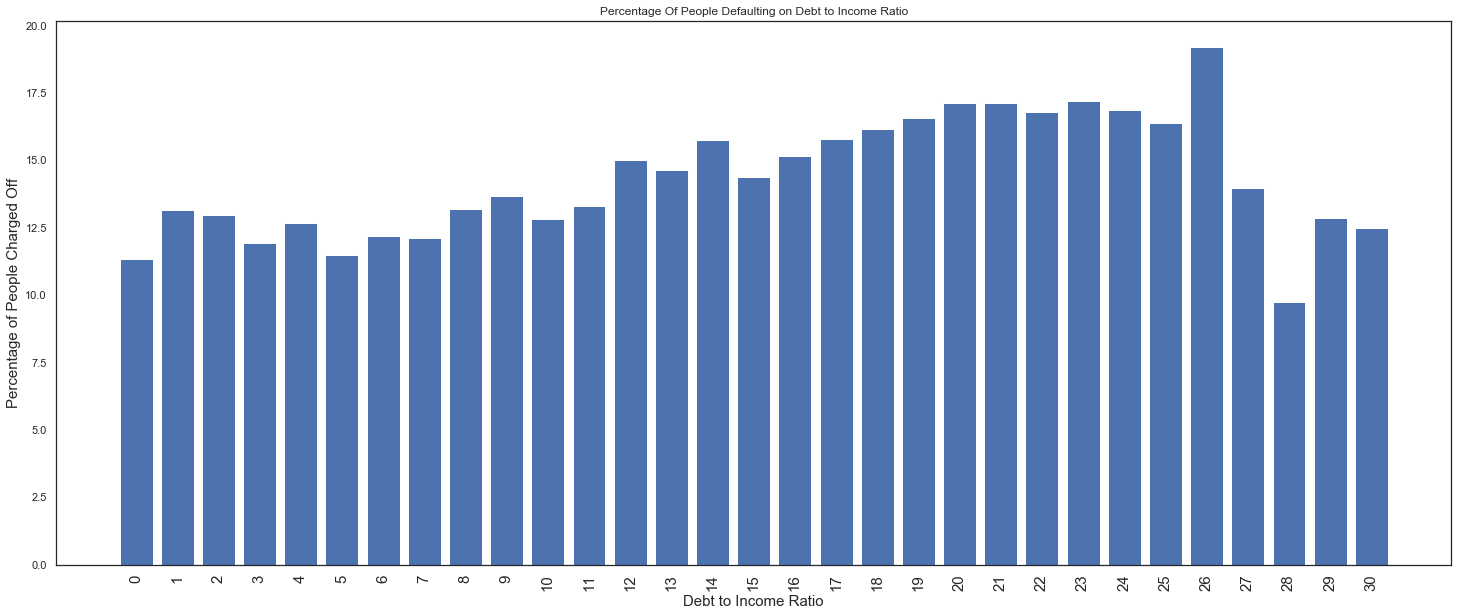

In [164]:

groupByDTItDf = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))



groupByDTItDf['dtirate']  = groupByDTItDf.index
groupByDTItDf['ChargedOffCount'] = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByDTItDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('dtiRoundedOff')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByDTItDf['chargedOffPercentage'] = groupByDTItDf['ChargedOffCount']/(groupByDTItDf['Fully_Paid_Count']+groupByDTItDf['ChargedOffCount']) * 100
groupByDTItDf['fullyPaidPercentage'] = groupByDTItDf['Fully_Paid_Count']/(groupByDTItDf['Fully_Paid_Count']+groupByDTItDf['ChargedOffCount']) * 100
groupByDTItDf.head(10)


fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByDTItDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByDTItDf.dtirate)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Debt to Income Ratio', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Debt to Income Ratio')
plt.show()

#

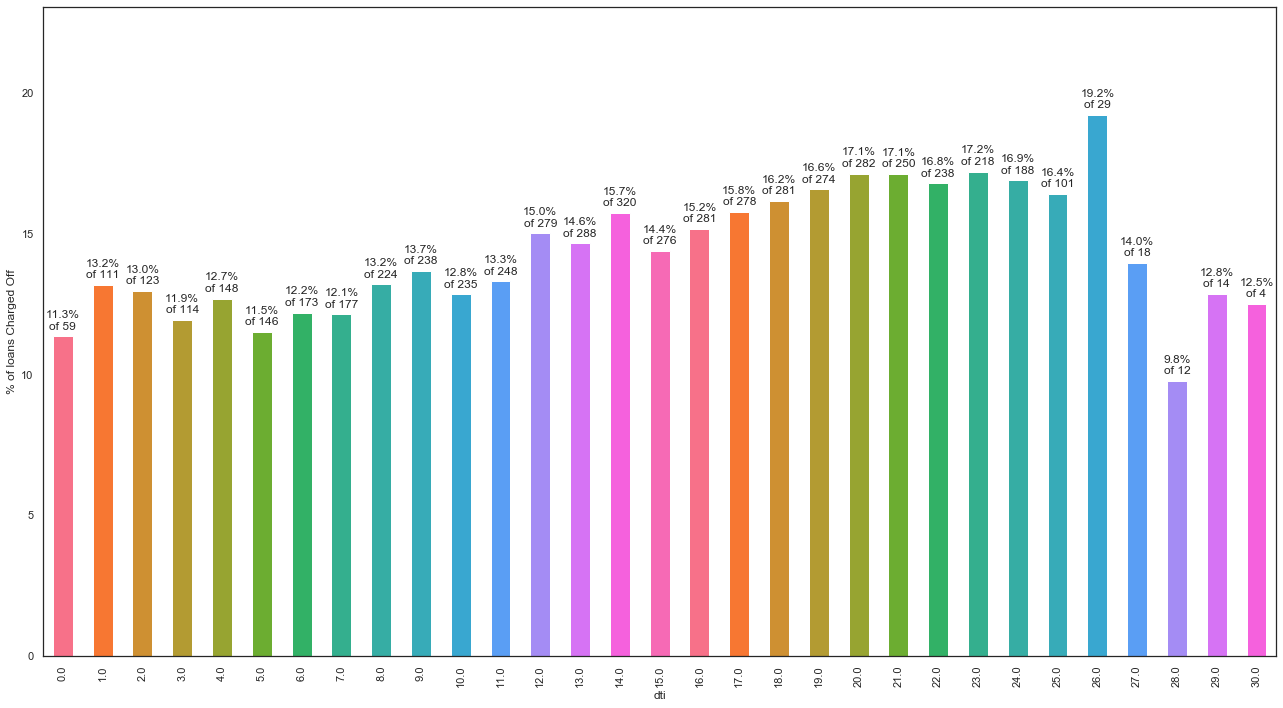

In [165]:
#newcode
sf=df.copy()
sf['dti']=round(sf['dti'])


plt.figure(figsize=(18, 10))
color=sns.color_palette('Set3', 16)
frp = sf.groupby(['loan_status','dti'])['dti'].count()
cnt = sf.groupby('dti')['dti'].count()

percentages = frp.unstack() * 100 / cnt.T
xx= percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
xx.set_ylabel('% of loans ' + 'Charged Off')
showLabels(xx, frp['Charged Off'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = frp.unstack() * 100 / cnt.T


## The Bar Graph implies there is no such impact of DTI on person defaulting on loan. 
## We need to consider the annual income of person to see the impact of DTI on our analysis

10


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


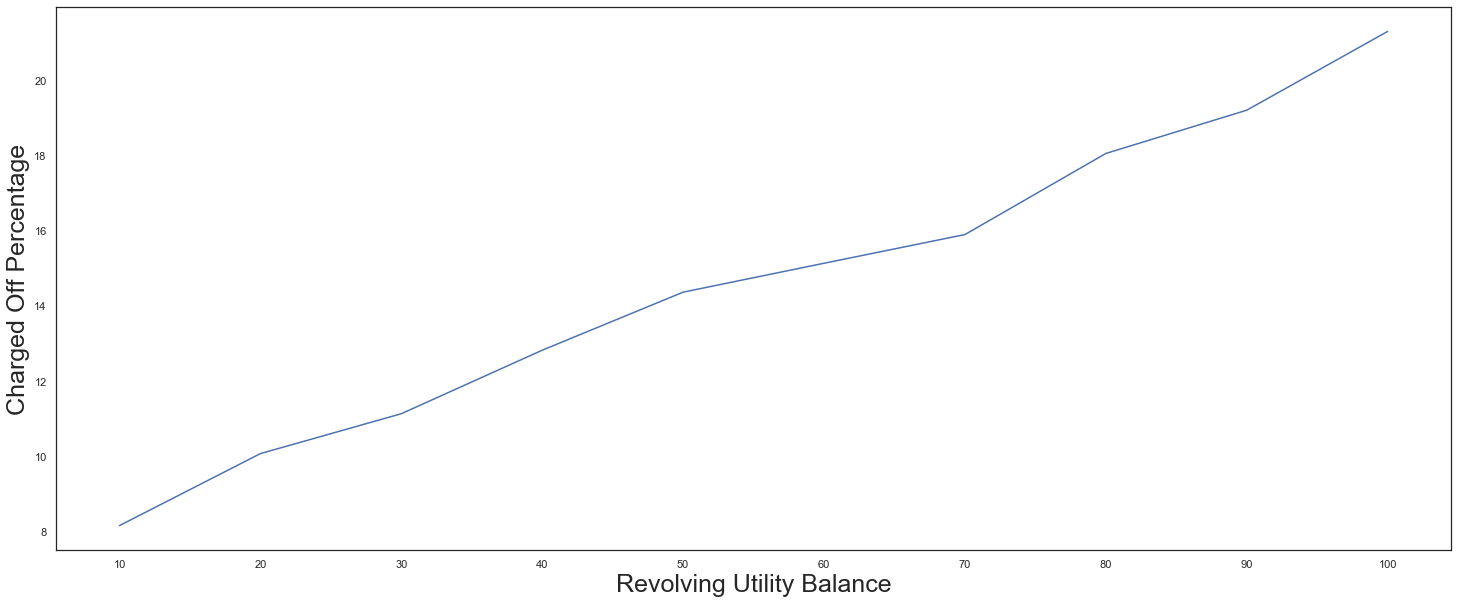

In [166]:
ranges=[0,10,20,30,40,50,60,70,80,90,100]

groupByRevolvUtilDf = df.groupby(pd.cut(df.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())

groupByRevolvUtilDf = groupByRevolvUtilDf.to_frame()
groupByRevolvUtilDf['ChargedOffCount'] = df.groupby(pd.cut(df.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByRevolvUtilDf['revol_util_range']  = groupByRevolvUtilDf.index
groupByRevolvUtilDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby(pd.cut(df.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))
groupByRevolvUtilDf['chargedOffPercentage'] = groupByRevolvUtilDf['ChargedOffCount']/(groupByRevolvUtilDf['Fully_Paid_Count']+groupByRevolvUtilDf['ChargedOffCount']) * 100
groupByRevolvUtilDf['fullyPaidPercentage'] = groupByRevolvUtilDf['Fully_Paid_Count']/(groupByRevolvUtilDf['Fully_Paid_Count']+groupByRevolvUtilDf['ChargedOffCount']) * 100

groupByRevolvUtilDf.head(10)

fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByRevolvUtilDf.chargedOffPercentage)

print(len(valuesList))
groupByRevolvUtilDf["revol_util_range"] = groupByRevolvUtilDf["revol_util_range"].astype('str')

groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range.str[3:8]
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip('  ,  ')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip(',')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip('(')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip(']')
groupByRevolvUtilDf ['revol_util_range'] = groupByRevolvUtilDf.revol_util_range_substr 
plt.xlabel('Revolving Utility Balance',fontsize=25)
plt.ylabel('Charged Off Percentage',fontsize=25)

xAxisValue = list(groupByRevolvUtilDf.revol_util_range_substr)
groupByRevolvUtilDf = groupByRevolvUtilDf.drop(columns=['loan_status', 'ChargedOffCount','Fully_Paid_Count','fullyPaidPercentage'])
groupByRevolvUtilDf = groupByRevolvUtilDf.set_index('revol_util_range')
#groupByRevolvUtilDf.plot.line()
plt.plot(xAxisValue,valuesList)
plt.show()


## As the Revolving Utility balance increase there is chance of person defaulting on loan

In [167]:
df1 = df.copy()



df1['issue_date_year'] = df1.issue_d.apply(lambda x: x.year)
df1['credit_year'] = df1.earliest_cr_line.apply(lambda x: x.year)
df1['differecce_in_year'] = df1.credit_year - df1.issue_date_year
df1.drop(df1[df1['differecce_in_year'] > 0].index, inplace = True) 
df1['differecce_in_year'] =  df1.differecce_in_year.abs() 


10


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


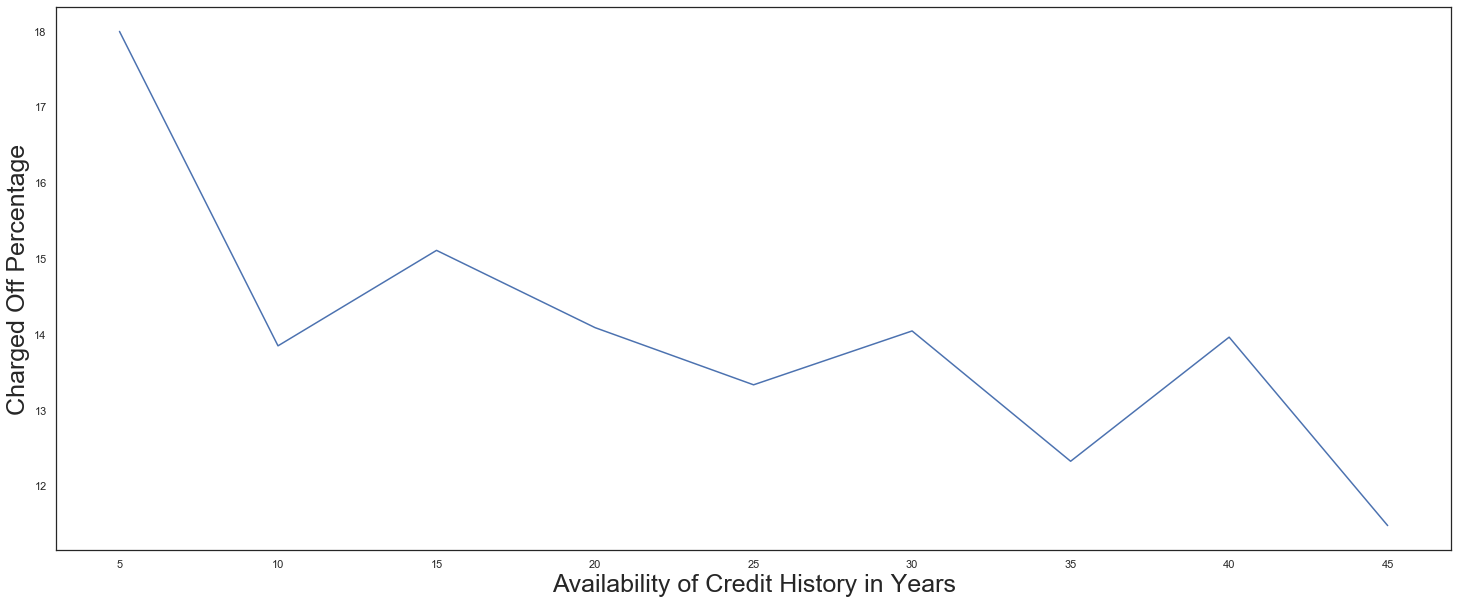

In [168]:
groupByCreditLineDf = df.groupby(pd.cut(df.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
ranges=[0,5,10,15,20,25,30,35,40,45,50]

groupByCreditLineDf = df1.groupby(pd.cut(df1.differecce_in_year, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByCreditLineDf = groupByCreditLineDf.to_frame()
groupByCreditLineDf['difference_range']  = groupByCreditLineDf.index
groupByCreditLineDf['ChargedOffCount'] = df1.groupby(pd.cut(df1.differecce_in_year, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByCreditLineDf['Fully_Paid_Count'] = df1.groupby(pd.cut(df1.differecce_in_year, ranges))['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count())
groupByCreditLineDf.head()

groupByCreditLineDf['chargedOffPercentage'] = groupByCreditLineDf['ChargedOffCount']/(groupByCreditLineDf['Fully_Paid_Count']+groupByCreditLineDf['ChargedOffCount']) * 100
groupByCreditLineDf['fullyPaidPercentage'] = groupByCreditLineDf['Fully_Paid_Count']/(groupByCreditLineDf['Fully_Paid_Count']+groupByCreditLineDf['ChargedOffCount']) * 100
groupByCreditLineDf.head()

fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByCreditLineDf.chargedOffPercentage)

print(len(valuesList))
groupByCreditLineDf["difference_range"] = groupByCreditLineDf["difference_range"].astype('str')


groupByCreditLineDf.difference_range_substr = groupByCreditLineDf.difference_range.str[3:8]
groupByCreditLineDf.difference_range_substr = groupByCreditLineDf.difference_range_substr.str.strip('  ,  ')
groupByCreditLineDf.difference_range_substr = groupByCreditLineDf.difference_range_substr.str.strip(',')
groupByCreditLineDf.difference_range_substr = groupByCreditLineDf.difference_range_substr.str.strip('(')
groupByCreditLineDf.difference_range_substr = groupByCreditLineDf.difference_range_substr.str.strip(']')
groupByCreditLineDf ['difference_range'] = groupByCreditLineDf.difference_range_substr 
groupByCreditLineDf.head(10)


plt.xlabel('Availability of Credit History in Years',fontsize=25)
plt.ylabel('Charged Off Percentage',fontsize=25)

xAxisValue = list(groupByCreditLineDf.difference_range_substr)
groupByCreditLineDf = groupByCreditLineDf.drop(columns=['loan_status', 'ChargedOffCount','Fully_Paid_Count','fullyPaidPercentage'])
groupByCreditLineDf = groupByCreditLineDf.set_index('difference_range')
#groupByRevolvUtilDf.plot.line()
plt.plot(xAxisValue,valuesList)
plt.show()


### More the Credit History available of person, it is less likely to defauly considering other factors also like job stability DTI Ratio, Debt to asset ratio etc


14


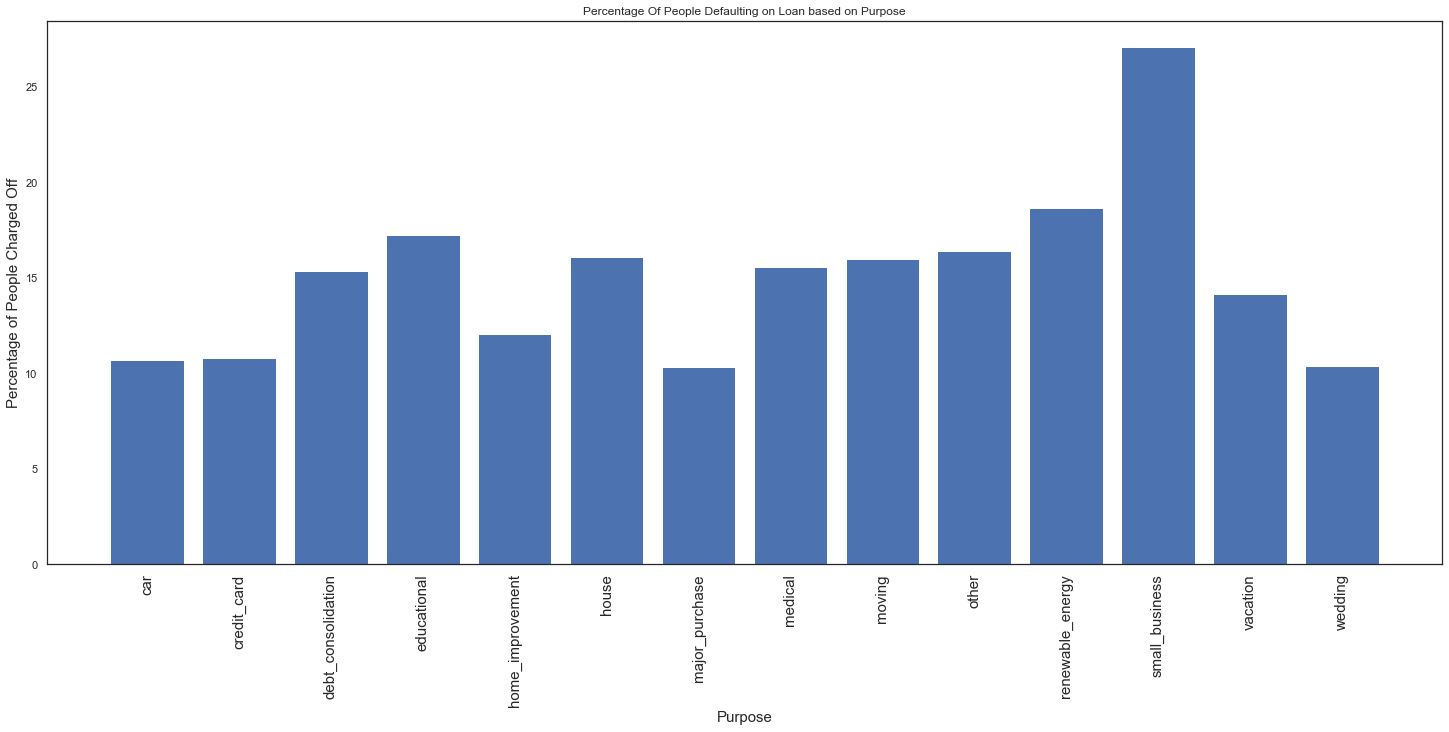

In [169]:
#Unoivariate Ananlysis on Purpose loan
groupByPurposeDf = df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByPurposeDf = groupByPurposeDf.to_frame()
groupByPurposeDf['ChargedOffCount'] =df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByPurposeDf['Fully_Paid_Count'] = pd.DataFrame(df.groupby('purpose')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByPurposeDf['Purpose'] = groupByPurposeDf.index
groupByPurposeDf['chargedOffPercentage'] = groupByPurposeDf['ChargedOffCount']/(groupByPurposeDf['Fully_Paid_Count']+groupByPurposeDf['ChargedOffCount']) * 100
groupByPurposeDf['fullyPaidPercentage'] = groupByPurposeDf['Fully_Paid_Count']/(groupByPurposeDf['Fully_Paid_Count']+groupByPurposeDf['ChargedOffCount']) * 100
#groupByPurposeDf['Purpose']  = groupByPurposeDf.index
fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByPurposeDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByPurposeDf.Purpose)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Loan based on Purpose')
plt.show()

##### The Person taking loans for Small Business is defaulting more on loan
##### We need to find at what is the better interest we can offer to them so the chances of going default go very less


10


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


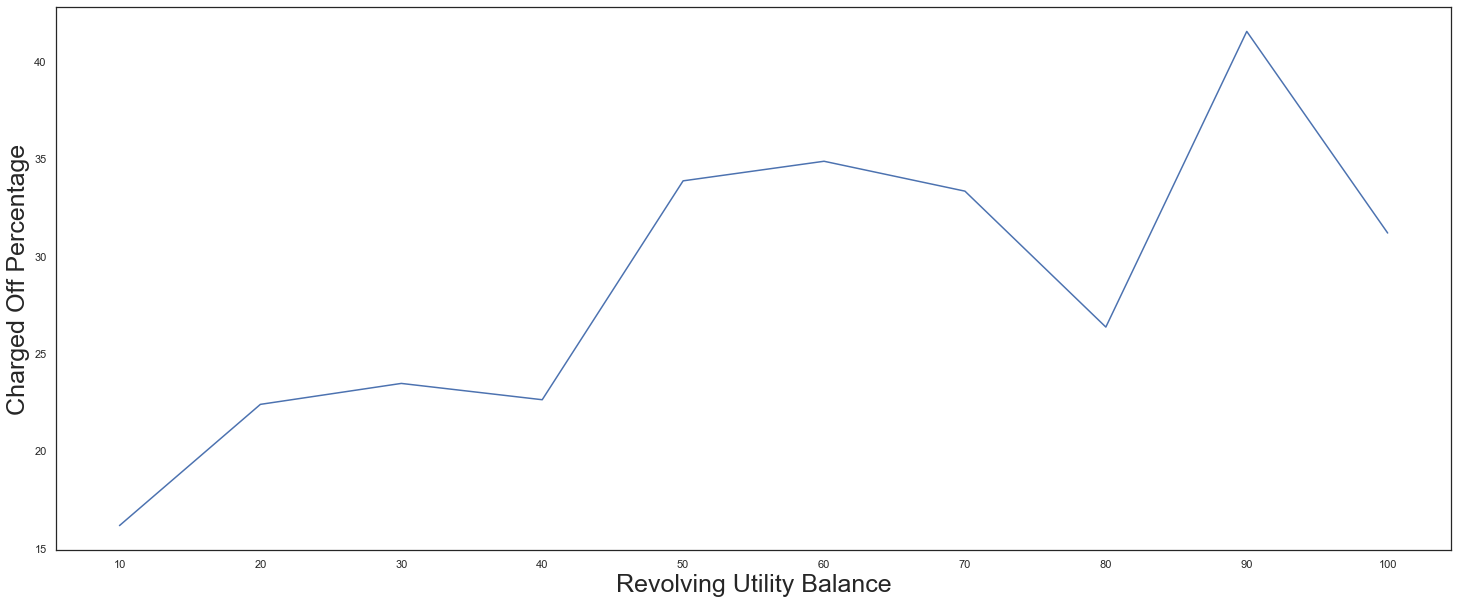

In [170]:
smallBusinessDf = df.loc[df['purpose'] == 'small_business'] 

ranges=[0,10,20,30,40,50,60,70,80,90,100]

groupByRevolvUtilDf = smallBusinessDf.groupby(pd.cut(smallBusinessDf.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())

groupByRevolvUtilDf = groupByRevolvUtilDf.to_frame()
groupByRevolvUtilDf['ChargedOffCount'] = smallBusinessDf.groupby(pd.cut(smallBusinessDf.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Charged Off'].count())
groupByRevolvUtilDf['revol_util_range']  = groupByRevolvUtilDf.index
groupByRevolvUtilDf['Fully_Paid_Count'] = pd.DataFrame(smallBusinessDf.groupby(pd.cut(smallBusinessDf.revol_utilRoundedOff, ranges))['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))
groupByRevolvUtilDf['chargedOffPercentage'] = groupByRevolvUtilDf['ChargedOffCount']/(groupByRevolvUtilDf['Fully_Paid_Count']+groupByRevolvUtilDf['ChargedOffCount']) * 100
groupByRevolvUtilDf['fullyPaidPercentage'] = groupByRevolvUtilDf['Fully_Paid_Count']/(groupByRevolvUtilDf['Fully_Paid_Count']+groupByRevolvUtilDf['ChargedOffCount']) * 100

groupByRevolvUtilDf.head(10)

fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByRevolvUtilDf.chargedOffPercentage)

print(len(valuesList))
groupByRevolvUtilDf["revol_util_range"] = groupByRevolvUtilDf["revol_util_range"].astype('str')

groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range.str[3:8]
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip('  ,  ')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip(',')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip('(')
groupByRevolvUtilDf.revol_util_range_substr = groupByRevolvUtilDf.revol_util_range_substr.str.strip(']')
groupByRevolvUtilDf ['revol_util_range'] = groupByRevolvUtilDf.revol_util_range_substr 
plt.xlabel('Revolving Utility Balance',fontsize=25)
plt.ylabel('Charged Off Percentage',fontsize=25)

xAxisValue = list(groupByRevolvUtilDf.revol_util_range_substr)
groupByRevolvUtilDf = groupByRevolvUtilDf.drop(columns=['loan_status', 'ChargedOffCount','Fully_Paid_Count','fullyPaidPercentage'])
groupByRevolvUtilDf = groupByRevolvUtilDf.set_index('revol_util_range')
#groupByRevolvUtilDf.plot.line()
plt.plot(xAxisValue,valuesList)
plt.show()




## If the revoving utilty balace is greater than 10% of person who is applying for a loan for a purpose of small business is likely to default on  


7


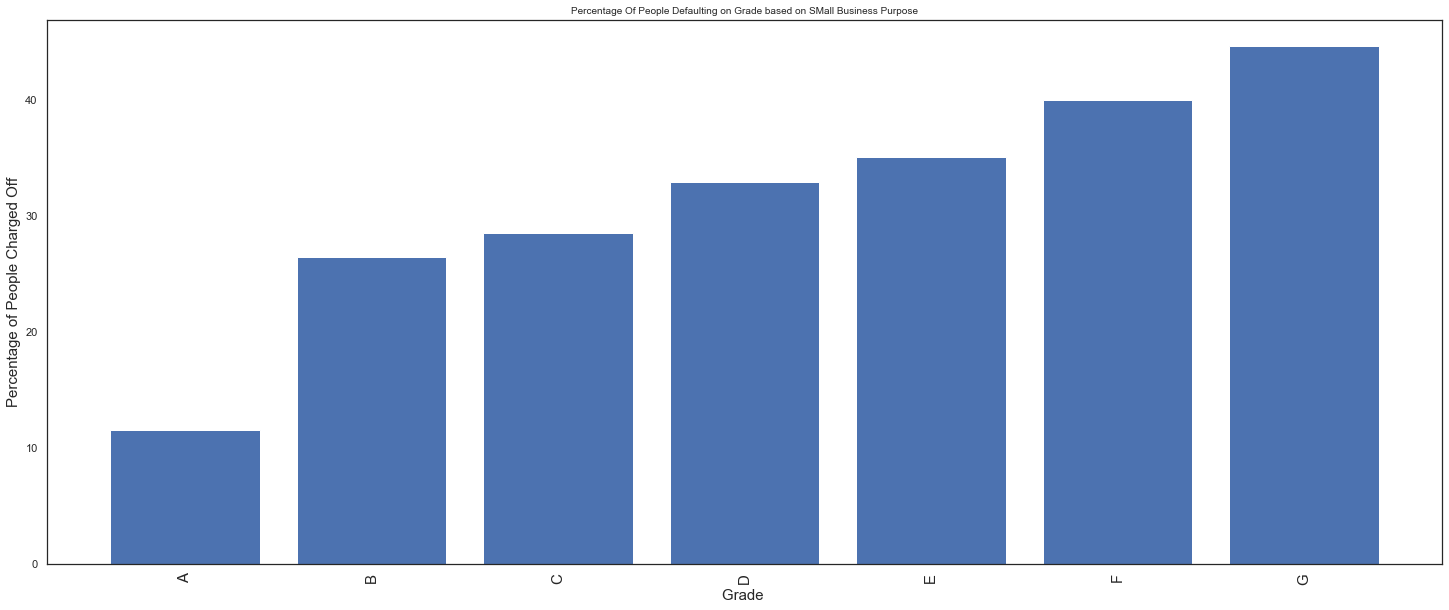

In [171]:
### Analysing the Prpose of loan with Grade


groupByGradetDf = pd.DataFrame(smallBusinessDf.groupby('grade')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))



groupByGradetDf['grade']  = groupByGradetDf.index
groupByGradetDf['ChargedOffCount'] = pd.DataFrame(smallBusinessDf.groupby('grade')['loan_status'].apply(lambda x: x[x == 'Charged Off'].count()))
groupByGradetDf['Fully_Paid_Count'] = pd.DataFrame(smallBusinessDf.groupby('grade')['loan_status'].apply(lambda x: x[x == 'Fully Paid'].count()))

groupByGradetDf['chargedOffPercentage'] = groupByGradetDf['ChargedOffCount']/(groupByGradetDf['Fully_Paid_Count']+groupByGradetDf['ChargedOffCount']) * 100
groupByGradetDf['fullyPaidPercentage'] = groupByGradetDf['Fully_Paid_Count']/(groupByGradetDf['Fully_Paid_Count']+groupByGradetDf['ChargedOffCount']) * 100
groupByGradetDf.head(10)


fig  = plt.figure(figsize=(25,10))

valuesList = list(groupByGradetDf.chargedOffPercentage)

print(len(valuesList))
xAxisValue = list(groupByGradetDf.grade)
plt.bar(xAxisValue, valuesList)
plt.xlabel('Grade ', fontsize=15)
plt.ylabel('Percentage of People Charged Off', fontsize=15)
plt.xticks(xAxisValue, fontsize=15, rotation=90)

plt.title('Percentage Of People Defaulting on Grade based on SMall Business Purpose',fontsize=10)
plt.show()



## The People with  purpose of businees other than Grade A are likely to default on loan


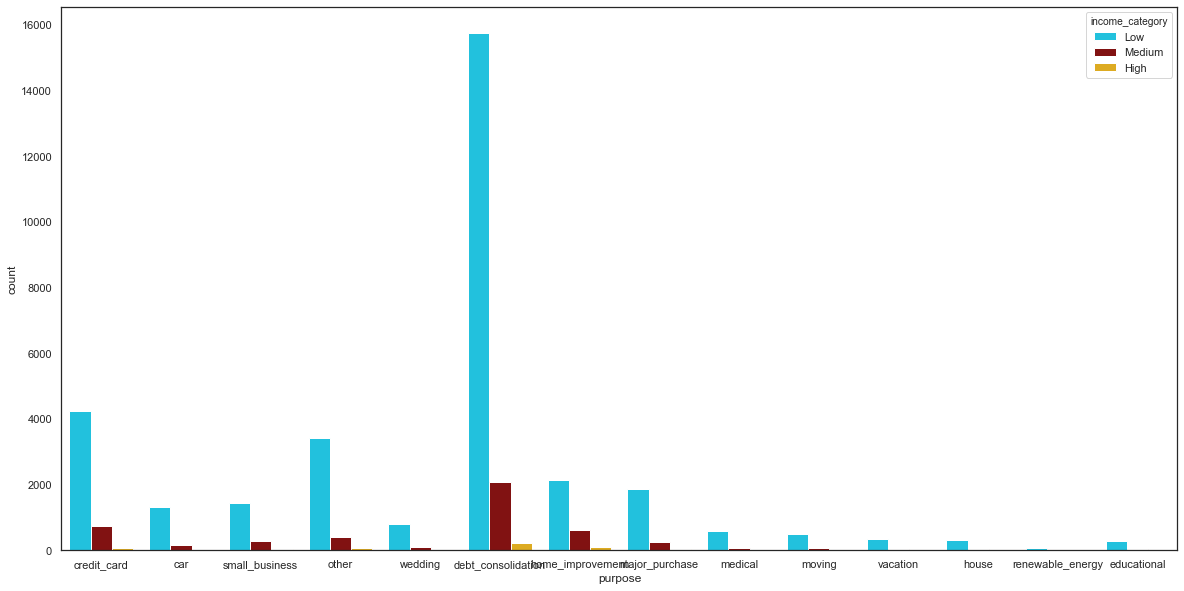

In [172]:
#bivariate analysis of purpose and Interest level category
df.pivot_table(values='id',columns='loan_status',index=['int_level','purpose'],aggfunc='count').reset_index().sort_values('Charged Off',ascending=False)

s=df.pivot_table(values='id',columns='loan_status',index=['int_level','purpose'],aggfunc='count').reset_index()
s['coff/total']=round(100*s['Charged Off']/(s['Fully Paid']+s['Charged Off']),2)
s.sort_values('coff/total',ascending=False)
df.pivot_table(values='id',columns='loan_status',index=['income_category','purpose'],aggfunc='count')
plt.figure(figsize=(20, 10))
sns.countplot(x='purpose', data=df, 
                   palette=['#03d7fc', '#930000','#fcba03'], hue='income_category')
#other,small_buss,house,educational are having more risk in high interest rates ie. they are having more charged off
#small_business are likely to go in charged off with low interset rates

Charged off are more for debt consolidation

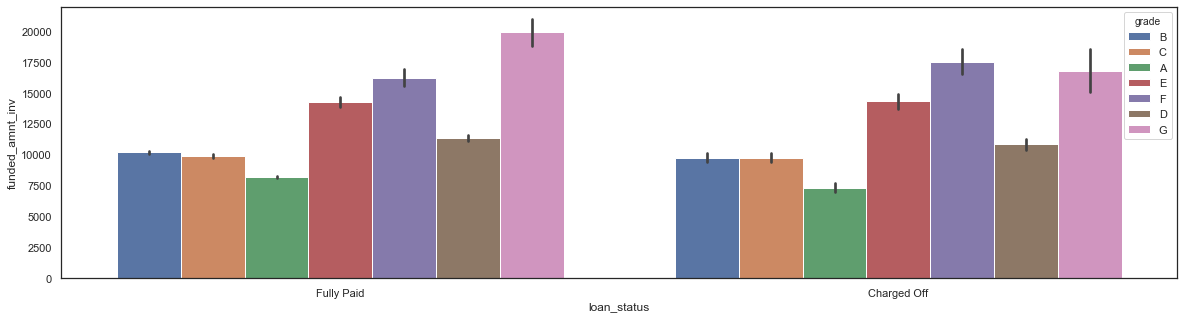

In [173]:
#bivariate of invested amount  and Grade
plt.figure(figsize=(20,5))
sns.barplot(x='loan_status', y='funded_amnt_inv', hue='grade',data=df, estimator=np.mean)
plt.show()

As funded amount increases the risky loan is under grade 'F'

In [174]:
df2 = df.copy()

df2['Loan_Status_Indicator'] = ['1' if x =='Charged Off' else '0' for x in df2['loan_status']] 


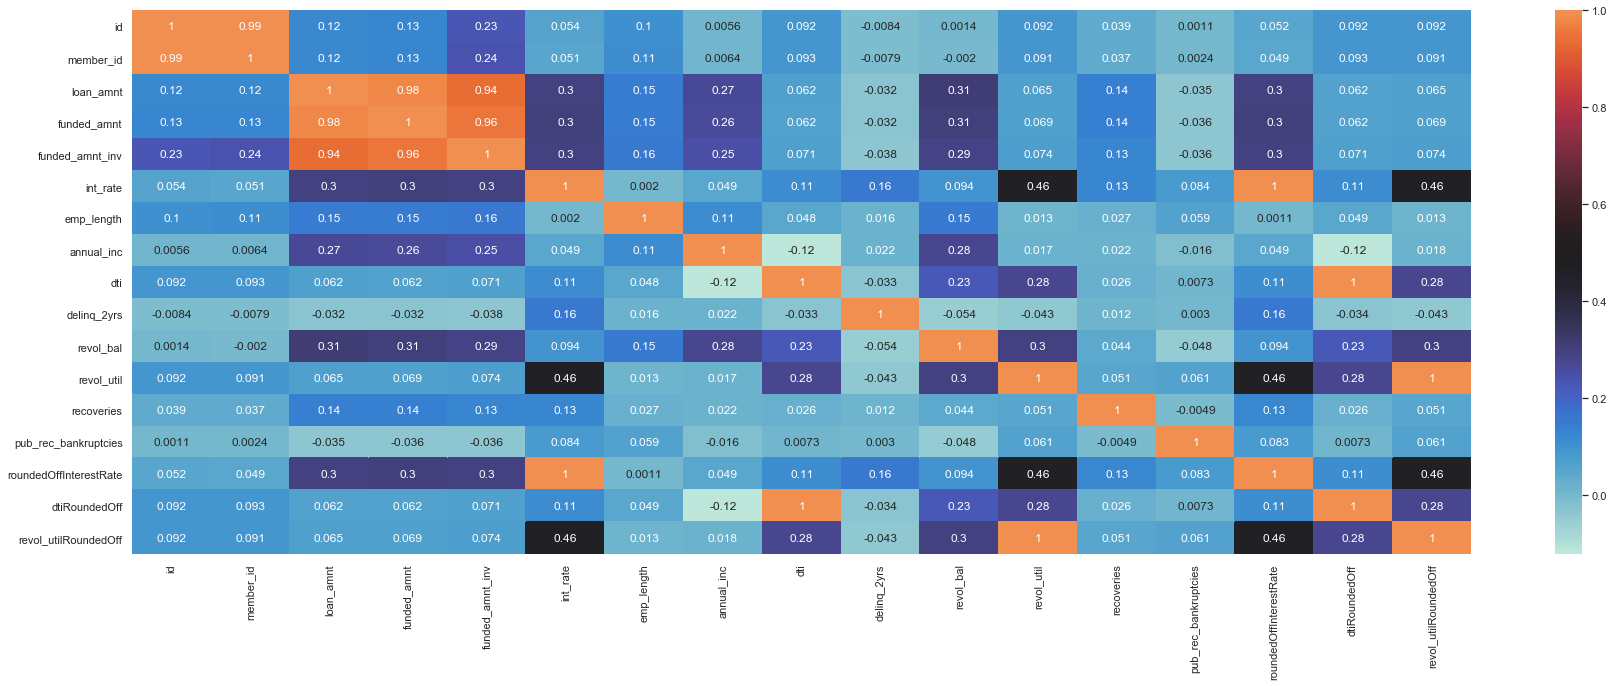

In [175]:
plt.figure(figsize=(30,10))
corr1 = df.corr()
sns.heatmap(corr1, annot=True, center=0.5)

Observation:
1)Funded amount and loan amount has 0.98 correlation factor we more. We know that as loan amount increases the % risky loan increases hence it is true for funded amount and funded amount by inv.

2)Dti has negative correlation factor with annual income .

3)Deliqe_2year has not significant impact on the other parameters.

4) Int_rate is correlated to revol_util with 0.46.it states that defaulters have more interest rate.

5) loan_amnt revol_bal are correlated with 0.35 i.e. Higher loan amount approved to defaulters.


In [176]:
sns.set(font_scale=1.8)

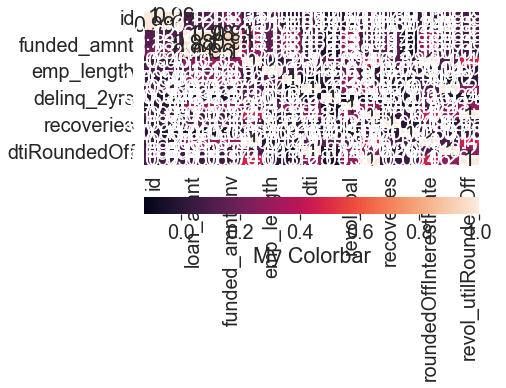

In [177]:
heat_map = sns.heatmap(corr1, annot=True, cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})
plt.show()